In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy.spatial.distance import euclidean
from scipy.interpolate import interp1d
import xlrd
from itertools import groupby
from statistics import mean
from matplotlib import cm
import csv
from scipy.spatial.distance import cdist
import bisect
import pywt
from scipy import stats, signal, integrate
from dit.other import tsallis_entropy
import dit
import librosa
import statsmodels.api as sm
import itertools
from pyinform import mutualinfo
from statsmodels import tsa
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score as normed_mutual_info 


C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.neighbors import KDTree

In [3]:
pathfp=r'F:\KyotoUdata\EEG\FP'
filesfp=sorted(os.listdir(pathfp))
pathsf=r'F:\KyotoUdata\EEG\SF'
filessf=sorted(os.listdir(pathsf))
pathre=r'F:\KyotoUdata\EEG\RE'
filesre=sorted(os.listdir(pathre))
pathst=r'F:\KyotoUdata\EEG\ST'
filesst=sorted(os.listdir(pathst))

In [4]:
print(filesfp)

['006_MS9EEG1FP.csv', '007_MS9EEG1FP.csv', '008_MS9EEG1FP.csv', '010_MS9EEG1FP.csv', '011_MS9EEG1FP.csv', '014_MS9EEG1FP.csv', '015_MS9EEG1FP.csv', '018_MS9EEG1FP.csv', '024_MS9EEG1FP.csv', '025_MS9EEG1FP.csv', '026_MS9EEG1FP.csv', '030_MS9EEG1FP.csv', '032_MS9EEG1FP.csv', '033_MS9EEG1FP.csv', '034_MS9EEG1FP.csv', '035_MS9EEG1FP.csv', '037_MS9EEG1FP.csv', '038_MS9EEG1FP.csv', '041_MS9EEG1FP.csv', '042_MS9EEG1FP.csv']


In [5]:
datafpm=np.empty((len(filesfp),1),dtype=object)
datasfm=np.empty((len(filessf),1),dtype=object)
datarem=np.empty((len(filesre),1),dtype=object)
datastm=np.empty((len(filesst),1),dtype=object)

In [6]:
datafpc=np.empty((len(filesfp),1),dtype=object)
datasfc=np.empty((len(filessf),1),dtype=object)
datarec=np.empty((len(filesre),1),dtype=object)
datastc=np.empty((len(filesst),1),dtype=object)

In [7]:
headfpm=np.empty((len(filesfp),16),dtype=object)
headsfm=np.empty((len(filessf),16),dtype=object)
headrem=np.empty((len(filesre),16),dtype=object)
headstm=np.empty((len(filesst),16),dtype=object)

In [8]:
headfpc=np.empty((len(filesfp),16),dtype=object)
headsfc=np.empty((len(filessf),16),dtype=object)
headrec=np.empty((len(filesre),16),dtype=object)
headstc=np.empty((len(filesst),16),dtype=object)

In [9]:
def removespace(listin):
    for i in listin:
        if '' in listin:
            listin.remove('')
    return listin

In [10]:
def dataread(pathin):
    datap= pd.read_csv(pathin)
    columnlen=len(datap.iloc[:,0])
    head=[]
    with open (pathin) as f:
        test = list(csv.reader(f, delimiter=" "))
        test1=[x for x in test[:][0] if x!='']
        rowlen=len(test1)
    data=np.zeros((rowlen-1,columnlen))
    with open (pathin) as f:
        test = list(csv.reader(f, delimiter=" "))
        for i in range(columnlen):
            tem=[x for x in test[:][i] if x!='']
            data[:,i]=tem[1:]
            head.append(tem[0])
    return head,data

In [11]:
for i in range(len(filesfp)):
    headfp,datafp=dataread(pathfp+'\\'+filesfp[i])
    headsf,datasf=dataread(pathsf+'\\'+filessf[i])
    headre,datare=dataread(pathre+'\\'+filesre[i])
    headst,datast=dataread(pathst+'\\'+filesst[i])
    #print(headfp[:16],headfp[18:-1])
    headfpc[i]=headfp[:16]
    headfpm[i]=headfp[18:-1]
    headsfc[i]=headsf[:16]
    headsfm[i]=headsf[18:-1]
    headrec[i]=headre[:16]
    headrem[i]=headre[18:-1]
    headstc[i]=headst[:16]
    headstm[i]=headst[18:-1]
    
    datafpc[i]=[datafp[:,:16]]
    datafpm[i]=[datafp[:,18:-1]]
    datasfc[i]=[datasf[:,:16]]
    datasfm[i]=[datasf[:,18:-1]]
    datarec[i]=[datare[:,:16]]
    datarem[i]=[datare[:,18:-1]]
    datastc[i]=[datast[:,:16]]
    datastm[i]=[datast[:,18:-1]]

In [12]:
datafprawm=np.empty((len(filesfp),1),dtype=object)
datasfrawm=np.empty((len(filessf),1),dtype=object)
datarerawm=np.empty((len(filesre),1),dtype=object)
datastrawm=np.empty((len(filesst),1),dtype=object)

datafprawc=np.empty((len(filesfp),1),dtype=object)
datasfrawc=np.empty((len(filessf),1),dtype=object)
datarerawc=np.empty((len(filesre),1),dtype=object)
datastrawc=np.empty((len(filesst),1),dtype=object)

In [13]:
def meanall(datain,dataout):
    for i in range(len(datain)):
        dataout[i]=[np.mean(datain[i][0],axis=1)]
    return dataout

In [14]:
datafprawm=meanall(datafpm,datafprawm)
datasfrawm=meanall(datasfm,datasfrawm)
datarerawm=meanall(datarem,datarerawm)

datafprawc=meanall(datafpc,datafprawc)
datasfrawc=meanall(datasfc,datasfrawc)
datarerawc=meanall(datarec,datarerawc)


In [15]:
len(datafprawm[0][0])/500

120.314

In [16]:
def datacombine(datafpin,datasfin,datarein,datacin):
    for i in range(len(datafpin)):
        datacin[i]=[np.r_[datafpin[i][0],datasfin[i][0],datarein[i][0]]]
    return datacin

In [17]:
bdatam=np.empty((len(filesfp),1),dtype=object)
bdatac=np.empty((len(filesfp),1),dtype=object)

In [18]:
bdatam=datacombine(datafprawm,datasfrawm,datarerawm,bdatam)
bdatac=datacombine(datafprawc,datasfrawc,datarerawc,bdatac)

In [19]:
bdatamdown=np.empty((len(filesfp),1),dtype=object)
bdatacdown=np.empty((len(filesfp),1),dtype=object)

In [20]:
sampling_rate = 500
downsample_factor = 1  # In this case, downsample by 1 second

In [21]:
ddatafpm=np.empty((len(filesfp),1),dtype=object)
ddatasfm=np.empty((len(filessf),1),dtype=object)
ddatarem=np.empty((len(filesre),1),dtype=object)
ddatastm=np.empty((len(filesst),1),dtype=object)

ddatafpc=np.empty((len(filesfp),1),dtype=object)
ddatasfc=np.empty((len(filessf),1),dtype=object)
ddatarec=np.empty((len(filesre),1),dtype=object)
ddatastc=np.empty((len(filesst),1),dtype=object)

In [22]:
def downsample_time_serieso(time_series, sampling_rate, downsample_factor):
    # Calculate the number of samples to average for downsampling
    samples_per_second = sampling_rate
    samples_to_average = int(samples_per_second * downsample_factor)

    # Calculate overlap
    overlap = samples_to_average // 2

    # Calculate the number of windows
    num_windows = (len(time_series) - samples_to_average) // overlap+1

    # Initialize the downsampled time series array
    downsampled_time_series = np.zeros((num_windows, 1))

    # Populate the downsampled time series array using overlapping windows
    for i in range(num_windows):
        start = i * overlap
        end = start + samples_to_average
        window_data = time_series[start:end]# Extract the windowed data
        #print('w',len(window_data))
        downsampled_time_series[i] = np.mean(window_data, axis=0)  # Compute the mean along the window
        #print('d',downsampled_time_series[i])
    return downsampled_time_series

In [23]:
def downall(dataallin,dataout):
    for i in range(len(filesfp)):
        datain=dataallin[i][0]
        #print(i,datain)
        downin=downsample_time_serieso(datain, sampling_rate, downsample_factor)
        dataout[i]=[downin]
    return dataout

In [24]:
ddatafpm=downall(datafprawm,ddatafpm)
ddatafpc=downall(datafprawc,ddatafpc)

ddatasfm=downall(datasfrawm,ddatasfm)
ddatasfc=downall(datasfrawc,ddatasfc)

ddatarem=downall(datarerawm,ddatarem)
ddatarec=downall(datarerawc,ddatarec)

In [25]:
bdatamdown=datacombine(ddatafpm,ddatasfm,ddatarem,bdatamdown)
bdatacdown=datacombine(ddatafpc,ddatasfc,ddatarec,bdatacdown)

In [26]:
def filt_data(eegData, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    filt_eegData = signal.lfilter(b, a,  eegData)
    return filt_eegData

In [27]:
datafpmf=np.empty((len(filesfp),1),dtype=object)
datasfmf=np.empty((len(filessf),1),dtype=object)
dataremf=np.empty((len(filesre),1),dtype=object)
datastmf=np.empty((len(filesst),1),dtype=object)

datafpcf=np.empty((len(filesfp),1),dtype=object)
datasfcf=np.empty((len(filessf),1),dtype=object)
datarecf=np.empty((len(filesre),1),dtype=object)
datastcf=np.empty((len(filesst),1),dtype=object)

In [28]:
def filterall(datain,fsin,dataoutin):
    for i in range(len(datain)):
        d = filt_data(datain[i][0], 1, 4, fsin)
        t = filt_data(datain[i][0], 4, 8, fsin)
        a = filt_data(datain[i][0], 8, 12, fsin)
        b = filt_data(datain[i][0], 12, 30, fsin)
        g = filt_data(datain[i][0], 30, 100, fsin)
       # print(b)
        dataoutin[i]=[np.c_[d,t,a,b,g]]
    return dataoutin

In [29]:
len(datafprawm[0][0])

60157

In [30]:
datafpmf=filterall(datafprawm,sampling_rate,datafpmf)
datasfmf=filterall(datasfrawm,sampling_rate,datasfmf)
dataremf=filterall(datarerawm,sampling_rate,dataremf)

datafpcf=filterall(datafprawc,sampling_rate,datafpcf)
datasfcf=filterall(datasfrawc,sampling_rate,datasfcf)
datarecf=filterall(datarerawc,sampling_rate,datarecf)

In [31]:
# Extract the Shannon Entropy
# threshold the signal and make it discrete, normalize it and then compute entropy
def shannonEntropy(eegData, bin_min, bin_max, binWidth):
    H = np.zeros((eegData.shape[0], eegData.shape[2]))
    for chan in range(H.shape[0]):
        for epoch in range(H.shape[1]):
            counts, binCenters = np.histogram(eegData[chan,:,epoch], bins=np.arange(bin_min+1, bin_max, binWidth))
            nz = counts > 0
            prob = counts[nz] / np.sum(counts[nz])
            H[chan, epoch] = -np.dot(prob, np.log2(prob/binWidth))
    return H

# Extract the tsalis Entropy
def tsalisEntropy(eegData, bin_min, bin_max, binWidth, orders = [1]):
    H = [np.zeros((eegData.shape[0], eegData.shape[2]))]*len(orders)
    for chan in range(H[0].shape[0]):
        for epoch in range(H[0].shape[1]):
            counts, bins = np.histogram(eegData[chan,:,epoch], bins=np.arange(-200+1, 200, 2))
            dist = dit.Distribution([str(bc).zfill(5) for bc in bins[:-1]],counts/sum(counts))
            for ii,order in enumerate(orders):
                H[ii][chan,epoch] = tsallis_entropy(dist,order)
    return H

# Cepstrum Coefficients (n=2)
def mfcc(eegData,fs,order=2):
    H = np.zeros((eegData.shape[0], eegData.shape[2],order))
    for chan in range(H.shape[0]):
        for epoch in range(H.shape[1]):
            H[chan, epoch, : ] = librosa.feature.mfcc(np.asfortranarray(eegData[chan,:,epoch]), sr=fs)[0:order].T
    return H

# Lyapunov exponent
def lyapunov(eegData):
    return np.mean(np.log(np.abs(np.gradient(eegData))))


def hjorthMobility(xV):
    dxV = np.diff(xV)
    ddxV = np.diff(dxV)

    mx2 = np.mean(np.square(xV))
    mdx2 = np.mean(np.square(dxV))
    mddx2 = np.mean(np.square(ddxV))

    mob = mdx2 / mx2
    complexity = np.sqrt((mddx2 / mdx2) / mob)
    mobility = np.sqrt(mob)

    # PLEASE NOTE that Mohammad did NOT ACTUALLY use hjorth complexity,
    # in the matlab code for hjorth complexity subtraction by mob not division was used 
    return mobility

def hjorthComplexity(xV):
    dxV = np.diff(xV)
    ddxV = np.diff(dxV)

    mx2 = np.mean(np.square(xV))
    mdx2 = np.mean(np.square(dxV))
    mddx2 = np.mean(np.square(ddxV))

    mob = mdx2 / mx2
    complexity = np.sqrt((mddx2 / mdx2) / mob)
    mobility = np.sqrt(mob)

    # PLEASE NOTE that Mohammad did NOT ACTUALLY use hjorth complexity,
    # in the matlab code for hjorth complexity subtraction by mob not division was used 
    return complexity

# calculate band power
def bandPower(eegData, lowcut, highcut, fs):
    eegData_band = filt_data(eegData, lowcut, highcut, fs, order=7)
    freqs, powers = signal.periodogram(eegData_band, fs, axis=1)
    bandPwr = np.mean(powers,axis=1)
    return bandPwr

def eegStd(eegData):
    std_res = np.std(eegData)
    return std_res

def eegMedian(eegData):
    std_med = np.median(eegData)
    return std_med

In [32]:
def _getEmbeddedVectors(x, m, l):# pragma: no cover
    size = len(x) - (m - 1) * l
    X = np.zeros((m, size))
    for i in range(m):
        X[i]=x[i*l:i * l + size]

    return X.T
def _HFD(data, N, kMax, L, x):# pragma: no cover
    # Loop from 2 to kMax
    for k in range(2, kMax + 1):
        Lk = np.zeros(k)
        #Loop for compute the lenght of Lmk
        for m in range(0, k):
            Lmk = 0
            for i in range(1, (N - m) // k):
                Lmk += abs(data[m + i * k] - data[m + i * k - k])
            Lk[m]=Lmk * (N - 1) / (((N - m) // k) * k * k)
        Laux=np.mean(Lk)
        Laux=0.01/k if Laux==0 else Laux
        L[k-2]=np.log(Laux)

    p, _, _, _ = np.linalg.lstsq(x, L)
    return p[0]

def HFD(data,kMax=None):
    """
    Returns the Higuchi Fractal Dimension of the signal given data.

    Parameters
    ----------
    data: array_like
        signal

    kMax: int, optional
        By default it will be windowSize//4.

    Returns
    -------
    float
        The resulting value
    """
    #Inicializations
    data=np.array(data)
    N = len(data)
    kMax = N // 4 if kMax is None else kMax     #Default kMax
    L = np.zeros(kMax-1)
    x = np.array((-np.log(np.arange(2,kMax+1)),np.ones(kMax-1))).transpose()

    return _HFD(data, N, kMax, L, x)

In [33]:
def countSignChanges(data):
    """
    Returns the number of sign changes of a 1D array

    Parameters
    ----------
    data: array_like
        The data from which the sign changes will be counted

    Returns
    -------
    int
        Number of sign changes in the data
    """
    signChanges = 0
    for i in range(1, len(data)):
        if data[i] * data[i - 1] < 0:
            signChanges += 1
    return signChanges
def PFD(data):
    """
    Returns the Petrosian Fractal Dimension of the signal given in data.

    Parameters
    ----------
    data: array_like
        Signal

    Returns
    -------
    float
        The resulting value
    """
    derivative = np.diff(data)
    size=len(data)
    signChanges = countSignChanges(derivative)
    logSize = np.log(size)
    return logSize / (logSize + np.log(size / (size + 0.4 * signChanges)))

In [34]:
def _getEmbeddedVectors(x, m, l):# pragma: no cover
    size = len(x) - (m - 1) * l
    X = np.zeros((m, size))
    for i in range(m):
        X[i]=x[i*l:i * l + size]

def _countEmbeddedDistances(data, m, l, r):
    X = _getEmbeddedVectors(data , m, l)

    kdtree = KDTree(X, metric="chebyshev")
    # Return the count
    return np.sum(kdtree.query_radius(X, r, count_only=True) - 1)
def sampEn(data, m = 2, l = 1, r = None, fr = 0.2, eps = 1e-10):
    """
    Returns Sample Entropy of the given data.

    Parameters
    ----------
    data: array_like
        The signal
    m: int, optional
        Size of the embedded vectors. By default 2.
    l: int, optional
        Lag beetwen elements of embedded vectors. By default 1.
    r: float, optional
        Tolerance. By default fr*std(data)
    fr: float, optional
        Fraction of std(data) used as tolerance. If r is passed, this
        parameter is ignored. By default, 0.2.
    eps: float, optional
        Small number added to avoid infinite results. If 0 infinite results can
        appear. Default: 1e-10.

    Returns
    -------
    float
        The resulting value
    """
    if not r:
        r = fr * np.std(data)

    A = _countEmbeddedDistances(data, m+1, l, r) + eps
    B = _countEmbeddedDistances(data, m  , l, r) + eps

    if B == 0:# pragma: no cover
        return -np.inf

    if A == 0:# pragma: no cover
        return np.inf
    return -np.log(A/B)

In [35]:
def _maxdist(x_i, x_j):
    """Calculate the Chebyshev distance between two vectors."""
    return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

def _phi(m, time_series, r):
    """Compute the phi value for a given embedding dimension m and tolerance r."""
    N = len(time_series)
    x = [time_series[i:i + m] for i in range(N - m + 1)]
    C = [(sum(_maxdist(x[i], x[j]) <= r for j in range(N - m + 1)) - 1) / (N - m) for i in range(N - m + 1)]
    return sum(C) / (N - m + 1)

def sample_entropy(time_series, m=2, r = None, fr = 0.2, eps = 1e-10):
    """
    Calculate the sample entropy of a time series.

    Parameters:
    - time_series: The input time series as a 1D numpy array.
    - m: The embedding dimension (default is 2).
    - r: The tolerance (default is 0.2 times the standard deviation of the time series).

    Returns:
    - sampen: The sample entropy of the time series.
    """
    if isinstance(time_series, list):
        time_series = np.array(time_series)

    # Calculate the tolerance
    #r *= np.std(time_series)
    if not r:
        r = fr * np.std(time_series)
    # Calculate the phi values for m and m+1
    phi_m = _phi(m, time_series, r)
    phi_m1 = _phi(m + 1, time_series, r)
    
    # Calculate the sample entropy
    sampen = -np.log(phi_m1 / phi_m)
    
    return sampen

In [36]:
# Lempel-Ziv Complexity
def _LZC(sequence):# pragma: no cover
    n = len(sequence)
    complexity = 1

    q0    = 1
    qSize = 1

    sqi   = 0
    where = 0

    while q0 + qSize <= n:
        # If we are checking the end of the sequence we just need to look at
        # the last element
        if sqi != q0-1:
            contained, where = _isSubsequenceContained(sequence[q0:q0+qSize],
                                                    sequence[sqi:q0+qSize-1])
        else:
            contained = sequence[q0+qSize] == sequence[q0+qSize-1]

         #If Q is contained in sq~, we increase the size of q
        if contained:
            qSize+=1
            sqi = where
        #If Q is not contained the complexity is increased by 1 and reset Q
        else:
            q0+=qSize
            qSize=1
            complexity+=1
            sqi=0

    return complexity


def _binarize(data, threshold):
    if  not isinstance(data, np.ndarray):
        data = np.array(data)

    return np.array(data > threshold, np.uint8)

def _isSubsequenceContained(subSequence, sequence):# pragma: no cover
    """
    Checks if the subSequence is into the sequence and returns a tuple that
    informs if the subsequence is into and where. Return examples: (True, 7),
    (False, -1).
    """
    n = len(sequence)
    m = len(subSequence)

    for i in range(n-m+1):
        equal = True
        for j in range(m):
            equal = subSequence[j] == sequence[i+j]
            if not equal:
                break

        if equal:
            return True, i

    return False, -1

def LZC(data, threshold = None):
    """
    Returns the Lempel-Ziv Complexity (LZ76) of the given data.

    Parameters
    ----------
    data: array_like
        The signal.
    theshold: numeric, optional
        A number use to binarize the signal. The values of the signal above
        threshold will be converted to 1 and the rest to 0. By default, the
        median of the data.

    References
    ----------
    .. [1] M. Aboy, R. Hornero, D. Abasolo and D. Alvarez, "Interpretation of
           the Lempel-Ziv Complexity Measure in the Context of Biomedical
           Signal Analysis," in IEEE Transactions on Biomedical Engineering,
           vol. 53, no.11, pp. 2282-2288, Nov. 2006.
    """
    if not threshold:
        threshold=np.median(data)

    n = len(data)

    sequence = _binarize(data, threshold)

    c = _LZC(sequence)
    b = n/np.log2(n)

    lzc = c/b

    return lzc

In [37]:
def featureex(time_series, sampling_rate, downsample_factor):
    # Calculate the number of samples to average for downsampling
    samples_per_second = sampling_rate
    samples_to_average = int(samples_per_second * downsample_factor)

    # Calculate overlap
    overlap = samples_to_average // 2

    # Calculate the number of windows
    num_windows = (len(time_series) - samples_to_average) // overlap+1

    # Initialize the downsampled time series array
    downsampled_time_series = np.zeros((num_windows, 6))

    # Populate the downsampled time series array using overlapping windows
    for i in range(num_windows):
        start = i * overlap
        end = start + samples_to_average
        window_data = time_series[start:end]# Extract the windowed data
        #print('w',len(window_data))
        downsampled_time_series[i,0] = eegStd(window_data) 
        downsampled_time_series[i,1] = eegMedian(window_data) 
        downsampled_time_series[i,2] = hjorthMobility(window_data) 
        downsampled_time_series[i,3] = hjorthComplexity(window_data)
        downsampled_time_series[i,4] = HFD(window_data)
        downsampled_time_series[i,5] = lyapunov(window_data)
        #downsampled_time_series[i,6] = sample_entropy(window_data)
        #downsampled_time_series[i,7] = LZC(window_data)
    return downsampled_time_series

In [38]:
def featureext(time_series, sampling_rate, downsample_factor):
    # Calculate the number of samples to average for downsampling
    samples_per_second = sampling_rate
    samples_to_average = int(samples_per_second * downsample_factor)

    # Calculate overlap
    overlap = samples_to_average // 2

    # Calculate the number of windows
    num_windows = (len(time_series) - samples_to_average) // overlap+1

    # Initialize the downsampled time series array
    downsampled_time_series = np.zeros((num_windows, 6))
    out=[]

    # Populate the downsampled time series array using overlapping windows
    for i in range(num_windows):
        start = i * overlap
        end = start + samples_to_average
        window_data = time_series[start:end]# Extract the windowed data
        out.append(window_data)
        downsampled_time_series[i,0] = eegStd(window_data) 
        downsampled_time_series[i,1] = eegMedian(window_data) 
        downsampled_time_series[i,2] = hjorthMobility(window_data) 
        downsampled_time_series[i,3] = hjorthComplexity(window_data)
        downsampled_time_series[i,4] = HFD(window_data)
        downsampled_time_series[i,5] = lyapunov(window_data)
        #downsampled_time_series[i,6] = sample_entropy(window_data)
        #downsampled_time_series[i,7] = LZC(window_data)
    return [downsampled_time_series],out

In [39]:
import warnings; warnings.simplefilter('ignore')

In [40]:
featurec=np.empty((len(filesfp),1),dtype=object)
for i in range(len(filesfp)):
    featurec[i]=[featureex(bdatac[i][0], sampling_rate, downsample_factor)]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [41]:
featurem=np.empty((len(filesfp),1),dtype=object)
for i in range(len(filesfp)):
    featurem[i]=[featureex(bdatam[i][0], sampling_rate, downsample_factor)]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [42]:
minlen=10000000
for i in range(len(featurec)):
    if len(featurec[i][0])<minlen:
        minlen=len(featurec[i][0])

In [43]:
print(minlen)

718


In [44]:
def featuresep(datain):
    datastd=np.zeros((len(filesfp),int(minlen)))
    datamed=np.zeros((len(filesfp),int(minlen)))
    datahm=np.zeros((len(filesfp),int(minlen)))
    datahc=np.zeros((len(filesfp),int(minlen)))
    datahfd=np.zeros((len(filesfp),int(minlen)))
    datahl=np.zeros((len(filesfp),int(minlen)))
    datahse=np.zeros((len(filesfp),int(minlen)))
    for i in range(len(datain)):
        datatem=datain[i][0]
        datastd[i,:]=datatem[:minlen,0]
        datamed[i,:]=datatem[:minlen,1]
        datahm[i,:]=datatem[:minlen,2]
        datahc[i,:]=datatem[:minlen,3]
        datahfd[i,:]=datatem[:minlen,4]
        datahl[i,:]=datatem[:minlen,5]
        #datahse[i,:]=datatem[:minlen,6]
    return datastd,datamed,datahm,datahc,datahfd,datahl,datahse


In [45]:
datastdc,datamedc,datahmc,datahcc,datahfdc,datahlc,datahsec=featuresep(featurec)

In [46]:
datastdm,datamedm,datahmm,datahcm,datahfdm,datahlm,datahsem=featuresep(featurem)

In [47]:
datahlrc= datahlc.copy()
for i in range(len(datahlc[:,0])):
    datatem=datahlrc[i,:]
    valid_values = datatem[~np.isinf(datatem) & ~np.isnan(datatem)]
    mean_value = np.mean(valid_values)
    datahlrc[i,:]=np.where(datahlrc[i,:]==-np.inf, mean_value, datahlrc[i,:])
datahlrm= datahlm.copy()
for i in range(len(datahlm[:,0])):
    datatem=datahlrm[i,:]
    valid_values = datatem[~np.isinf(datatem) & ~np.isnan(datatem)]
    mean_value = np.mean(valid_values)
    datahlrm[i,:]=np.where(datahlrm[i,:]==-np.inf, mean_value, datahlrm[i,:])

In [48]:
np.corrcoef(datastdm[0,:],datastdc[0,:])[0,1]

0.03216669130177936

In [49]:
corrall=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrall[i,0]=np.abs(np.corrcoef(datastdm[i,:],datastdc[i,:])[0,1])
    corrall[i,1]=np.abs(np.corrcoef(datamedm[i,:],datamedc[i,:])[0,1])
    corrall[i,2]=np.abs(np.corrcoef(datahmm[i,:],datahmc[i,:])[0,1])
    corrall[i,3]=np.abs(np.corrcoef(datahcm[i,:],datahcc[i,:])[0,1])
    corrall[i,4]=np.abs(np.corrcoef(datahfdm[i,:],datahfdc[i,:])[0,1])
    corrall[i,5]=np.abs(np.corrcoef(datahlrm[i,:],datahlrc[i,:])[0,1])
    #corrall[i,6]=np.abs(np.corrcoef(datahsem[i,:],datahsec[i,:])[0,1])


In [50]:
corrallo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallo[i,0]=np.corrcoef(datastdm[i,:],datastdc[i,:])[0,1]
    corrallo[i,1]=np.corrcoef(datamedm[i,:],datamedc[i,:])[0,1]
    corrallo[i,2]=np.corrcoef(datahmm[i,:],datahmc[i,:])[0,1]
    corrallo[i,3]=np.corrcoef(datahcm[i,:],datahcc[i,:])[0,1]
    corrallo[i,4]=np.corrcoef(datahfdm[i,:],datahfdc[i,:])[0,1]
    corrallo[i,5]=np.corrcoef(datahlrm[i,:],datahlrc[i,:])[0,1]
    #corrallo[i,6]=np.corrcoef(datahsem[i,:],datahsec[i,:])[0,1]

In [51]:
corrallfp=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallfp[i,0]=np.abs(np.corrcoef(datastdm[i,:240],datastdc[i,:240])[0,1])
    corrallfp[i,1]=np.abs(np.corrcoef(datamedm[i,:240],datamedc[i,:240])[0,1])
    corrallfp[i,2]=np.abs(np.corrcoef(datahmm[i,:240],datahmc[i,:240])[0,1])
    corrallfp[i,3]=np.abs(np.corrcoef(datahcm[i,:240],datahcc[i,:240])[0,1])
    corrallfp[i,4]=np.abs(np.corrcoef(datahfdm[i,:240],datahfdc[i,:240])[0,1])
    corrallfp[i,5]=np.abs(np.corrcoef(datahlrm[i,:240],datahlrc[i,:240])[0,1])
    #corrallfp[i,6]=np.abs(np.corrcoef(datahsem[i,:240],datahsec[i,:240])[0,1])

In [52]:
corrallfpo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallfpo[i,0]=np.corrcoef(datastdm[i,:240],datastdc[i,:240])[0,1]
    corrallfpo[i,1]=np.corrcoef(datamedm[i,:240],datamedc[i,:240])[0,1]
    corrallfpo[i,2]=np.corrcoef(datahmm[i,:240],datahmc[i,:240])[0,1]
    corrallfpo[i,3]=np.corrcoef(datahcm[i,:240],datahcc[i,:240])[0,1]
    corrallfpo[i,4]=np.corrcoef(datahfdm[i,:240],datahfdc[i,:240])[0,1]
    corrallfpo[i,5]=np.corrcoef(datahlrm[i,:240],datahlrc[i,:240])[0,1]
    #corrallfpo[i,6]=np.corrcoef(datahsem[i,:240],datahsec[i,:240])[0,1]

In [53]:
corrallre=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallre[i,0]=np.abs(np.corrcoef(datastdm[i,-240:],datastdc[i,-240:])[0,1])
    corrallre[i,1]=np.abs(np.corrcoef(datamedm[i,-240:],datamedc[i,-240:])[0,1])
    corrallre[i,2]=np.abs(np.corrcoef(datahmm[i,-240:],datahmc[i,-240:])[0,1])
    corrallre[i,3]=np.abs(np.corrcoef(datahcm[i,-240:],datahcc[i,-240:])[0,1])
    corrallre[i,4]=np.abs(np.corrcoef(datahfdm[i,-240:],datahfdc[i,-240:])[0,1])
    corrallre[i,5]=np.abs(np.corrcoef(datahlrm[i,-240:],datahlrc[i,-240:])[0,1])
    #corrallre[i,6]=np.abs(np.corrcoef(datahsem[i,-240:],datahsec[i,-240:])[0,1])

In [54]:
corrallreo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallreo[i,0]=np.corrcoef(datastdm[i,-240:],datastdc[i,-240:])[0,1]
    corrallreo[i,1]=np.corrcoef(datamedm[i,-240:],datamedc[i,-240:])[0,1]
    corrallreo[i,2]=np.corrcoef(datahmm[i,-240:],datahmc[i,-240:])[0,1]
    corrallreo[i,3]=np.corrcoef(datahcm[i,-240:],datahcc[i,-240:])[0,1]
    corrallreo[i,4]=np.corrcoef(datahfdm[i,-240:],datahfdc[i,-240:])[0,1]
    corrallreo[i,5]=np.corrcoef(datahlrm[i,-240:],datahlrc[i,-240:])[0,1]
    #corrallreo[i,6]=np.corrcoef(datahsem[i,-240:],datahsec[i,-240:])[0,1]

In [55]:
corrallsfo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallsfo[i,0]=np.corrcoef(datastdm[i,240:480],datastdc[i,240:480])[0,1]
    corrallsfo[i,1]=np.corrcoef(datamedm[i,240:480],datamedc[i,240:480])[0,1]
    corrallsfo[i,2]=np.corrcoef(datahmm[i,240:480],datahmc[i,240:480])[0,1]
    corrallsfo[i,3]=np.corrcoef(datahcm[i,240:480],datahcc[i,240:480])[0,1]
    corrallsfo[i,4]=np.corrcoef(datahfdm[i,240:480],datahfdc[i,240:480])[0,1]
    corrallsfo[i,5]=np.corrcoef(datahlrm[i,240:480],datahlrc[i,240:480])[0,1]
    #corrallsfo[i,6]=np.corrcoef(datahsem[i,240:480],datahsec[i,240:480])[0,1]

In [56]:
def downindex(datain):
    dataout=np.zeros((len(datain[:,0]),240))
    for i in range(len(datain[:,0])):
        downsample_factor = len(datain[i,:]) // 240
        downsampled_time_series = np.mean(datain[i,:].reshape(-1, downsample_factor), axis=1)
        dataout[i,:] = downsampled_time_series[:240]
    return dataout

In [57]:
datastdmd=downindex(datastdm)
datamedmd=downindex(datamedm)
datahmmd=downindex(datahmm)
datahcmd=downindex(datahcm)
datahfdmd=downindex(datahfdm)
datahlrmd=downindex(datahlrm)
datahsemd=downindex(datahsem)

In [58]:
datastdcd=downindex(datastdc)
datamedcd=downindex(datamedc)
datahmcd=downindex(datahmc)
datahccd=downindex(datahcc)
datahfdcd=downindex(datahfdc)
datahlrcd=downindex(datahlrc)
datahsecd=downindex(datahsec)

In [59]:
corralld=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corralld[i,0]=np.abs(np.corrcoef(datastdm[i,:240],datastdcd[i,:])[0,1])
    corralld[i,1]=np.abs(np.corrcoef(datamedm[i,:240],datamedcd[i,:])[0,1])
    corralld[i,2]=np.abs(np.corrcoef(datahmm[i,:240],datahmcd[i,:])[0,1])
    corralld[i,3]=np.abs(np.corrcoef(datahcm[i,:240],datahccd[i,:])[0,1])
    corralld[i,4]=np.abs(np.corrcoef(datahfdm[i,:240],datahfdcd[i,:])[0,1])
    corralld[i,5]=np.abs(np.corrcoef(datahlrm[i,:240],datahlrcd[i,:])[0,1])
    #corralld[i,6]=np.abs(np.corrcoef(datahsem[i,:240],datahsecd[i,:])[0,1])

In [60]:
corralldo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corralldo[i,0]=np.corrcoef(datastdm[i,:240],datastdcd[i,:])[0,1]
    corralldo[i,1]=np.corrcoef(datamedm[i,:240],datamedcd[i,:])[0,1]
    corralldo[i,2]=np.corrcoef(datahmm[i,:240],datahmcd[i,:])[0,1]
    corralldo[i,3]=np.corrcoef(datahcm[i,:240],datahccd[i,:])[0,1]
    corralldo[i,4]=np.corrcoef(datahfdm[i,:240],datahfdcd[i,:])[0,1]
    corralldo[i,5]=np.corrcoef(datahlrm[i,:240],datahlrcd[i,:])[0,1]
    #corralldo[i,6]=np.corrcoef(datahsem[i,:240],datahsecd[i,:])[0,1]

In [61]:
corralldd=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corralldd[i,0]=np.abs(np.corrcoef(np.abs(datastdm[i,:240]-datastdc[i,:240]),datastdcd[i,:])[0,1])
    corralldd[i,1]=np.abs(np.corrcoef(np.abs(datamedm[i,:240]-datamedc[i,:240]),datamedcd[i,:])[0,1])
    corralldd[i,2]=np.abs(np.corrcoef(np.abs(datahmm[i,:240]-datahmc[i,:240]),datahmcd[i,:])[0,1])
    corralldd[i,3]=np.abs(np.corrcoef(np.abs(datahcm[i,:240]-datahcc[i,:240]),datahccd[i,:])[0,1])
    corralldd[i,4]=np.abs(np.corrcoef(np.abs(datahfdm[i,:240]-datahfdc[i,:240]),datahfdcd[i,:])[0,1])
    corralldd[i,5]=np.abs(np.corrcoef(np.abs(datahlrm[i,:240]-datahlrc[i,:240]),datahlrcd[i,:])[0,1])
    #corralldd[i,6]=np.abs(np.corrcoef(np.abs(datahsem[i,:240]-datahsec[i,:240]),datahsecd[i,:])[0,1])

In [62]:
corrallddo=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallddo[i,0]=np.corrcoef(np.abs(datastdm[i,:240]-datastdc[i,:240]),datastdcd[i,:])[0,1]
    corrallddo[i,1]=np.corrcoef(np.abs(datamedm[i,:240]-datamedc[i,:240]),datamedcd[i,:])[0,1]
    corrallddo[i,2]=np.corrcoef(np.abs(datahmm[i,:240]-datahmc[i,:240]),datahmcd[i,:])[0,1]
    corrallddo[i,3]=np.corrcoef(np.abs(datahcm[i,:240]-datahcc[i,:240]),datahccd[i,:])[0,1]
    corrallddo[i,4]=np.corrcoef(np.abs(datahfdm[i,:240]-datahfdc[i,:240]),datahfdcd[i,:])[0,1]
    corrallddo[i,5]=np.corrcoef(np.abs(datahlrm[i,:240]-datahlrc[i,:240]),datahlrcd[i,:])[0,1]
    #corrallddo[i,6]=np.corrcoef(np.abs(datahsem[i,:240]-datahsec[i,:240]),datahsecd[i,:])[0,1]

In [63]:
corralldc=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corralldc[i,0]=np.abs(np.corrcoef(datastdc[i,:240],datastdcd[i,:])[0,1])
    corralldc[i,1]=np.abs(np.corrcoef(datamedc[i,:240],datamedcd[i,:])[0,1])
    corralldc[i,2]=np.abs(np.corrcoef(datahmc[i,:240],datahmcd[i,:])[0,1])
    corralldc[i,3]=np.abs(np.corrcoef(datahcc[i,:240],datahccd[i,:])[0,1])
    corralldc[i,4]=np.abs(np.corrcoef(datahfdc[i,:240],datahfdcd[i,:])[0,1])
    corralldc[i,5]=np.abs(np.corrcoef(datahlrc[i,:240],datahlrcd[i,:])[0,1])
    #corralldc[i,6]=np.abs(np.corrcoef(datahsec[i,:240],datahsecd[i,:])[0,1])

In [64]:
corralldco=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corralldco[i,0]=np.corrcoef(datastdc[i,:240],datastdcd[i,:])[0,1]
    corralldco[i,1]=np.corrcoef(datamedc[i,:240],datamedcd[i,:])[0,1]
    corralldco[i,2]=np.corrcoef(datahmc[i,:240],datahmcd[i,:])[0,1]
    corralldco[i,3]=np.corrcoef(datahcc[i,:240],datahccd[i,:])[0,1]
    corralldco[i,4]=np.corrcoef(datahfdc[i,:240],datahfdcd[i,:])[0,1]
    corralldco[i,5]=np.corrcoef(datahlrc[i,:240],datahlrcd[i,:])[0,1]
    #corralldco[i,6]=np.corrcoef(datahsec[i,:240],datahsecd[i,:])[0,1]

In [65]:
corrallddr=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallddr[i,0]=np.abs(np.corrcoef(np.abs(datastdm[i,:240]-datastdc[i,:240]),datastdcd[i,-240:])[0,1])
    corrallddr[i,1]=np.abs(np.corrcoef(np.abs(datamedm[i,:240]-datamedc[i,:240]),datamedcd[i,-240:])[0,1])
    corrallddr[i,2]=np.abs(np.corrcoef(np.abs(datahmm[i,:240]-datahmc[i,:240]),datahmcd[i,-240:])[0,1])
    corrallddr[i,3]=np.abs(np.corrcoef(np.abs(datahcm[i,:240]-datahcc[i,:240]),datahccd[i,-240:])[0,1])
    corrallddr[i,4]=np.abs(np.corrcoef(np.abs(datahfdm[i,:240]-datahfdc[i,:240]),datahfdcd[i,-240:])[0,1])
    corrallddr[i,5]=np.abs(np.corrcoef(np.abs(datahlrm[i,:240]-datahlrc[i,:240]),datahlrcd[i,-240:])[0,1])
    #corrallddr[i,6]=np.abs(np.corrcoef(np.abs(datahsem[i,:240]-datahsec[i,:240]),datahsecd[i,-240:])[0,1])

In [66]:
corrallddro=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    corrallddro[i,0]=np.corrcoef(np.abs(datastdm[i,:240]-datastdc[i,:240]),datastdcd[i,-240:])[0,1]
    corrallddro[i,1]=np.corrcoef(np.abs(datamedm[i,:240]-datamedc[i,:240]),datamedcd[i,-240:])[0,1]
    corrallddro[i,2]=np.corrcoef(np.abs(datahmm[i,:240]-datahmc[i,:240]),datahmcd[i,-240:])[0,1]
    corrallddro[i,3]=np.corrcoef(np.abs(datahcm[i,:240]-datahcc[i,:240]),datahccd[i,-240:])[0,1]
    corrallddro[i,4]=np.corrcoef(np.abs(datahfdm[i,:240]-datahfdc[i,:240]),datahfdcd[i,-240:])[0,1]
    corrallddro[i,5]=np.corrcoef(np.abs(datahlrm[i,:240]-datahlrc[i,:240]),datahlrcd[i,-240:])[0,1]
    #corrallddro[i,6]=np.corrcoef(np.abs(datahsem[i,:240]-datahsec[i,:240]),datahsecd[i,-240:])[0,1]

In [67]:
mallm=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallm[i,0]=np.nanmean(datastdm[i,:])
    mallm[i,1]=np.nanmean(datamedm[i,:])
    mallm[i,2]=np.nanmean(datahmm[i,:])
    mallm[i,3]=np.nanmean(datahcm[i,:])
    mallm[i,4]=np.nanmean(datahfdm[i,:])
    mallm[i,5]=np.nanmean(datahlrm[i,:])
    #mallm[i,6]=np.nanmean(datahsem[i,:])

In [68]:
mallmfp=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallmfp[i,0]=np.nanmean(datastdm[i,:240])
    mallmfp[i,1]=np.nanmean(datamedm[i,:240])
    mallmfp[i,2]=np.nanmean(datahmm[i,:240])
    mallmfp[i,3]=np.nanmean(datahcm[i,:240])
    mallmfp[i,4]=np.nanmean(datahfdm[i,:240])
    mallmfp[i,5]=np.nanmean(datahlrm[i,:240])
    #mallmfp[i,6]=np.nanmean(datahsem[i,:240])

In [69]:
mallmre=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallmre[i,0]=np.nanmean(datastdm[i,-240:])
    mallmre[i,1]=np.nanmean(datamedm[i,-240:])
    mallmre[i,2]=np.nanmean(datahmm[i,-240:])
    mallmre[i,3]=np.nanmean(datahcm[i,-240:])
    mallmre[i,4]=np.nanmean(datahfdm[i,-240:])
    mallmre[i,5]=np.nanmean(datahlrm[i,-240:])
    #mallmre[i,6]=np.nanmean(datahsem[i,-240:])

In [70]:
mallmsf=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallmsf[i,0]=np.nanmean(datastdm[i,240:480])
    mallmsf[i,1]=np.nanmean(datamedm[i,240:480])
    mallmsf[i,2]=np.nanmean(datahmm[i,240:480])
    mallmsf[i,3]=np.nanmean(datahcm[i,240:480])
    mallmsf[i,4]=np.nanmean(datahfdm[i,240:480])
    mallmsf[i,5]=np.nanmean(datahlrm[i,240:480])
    #mallmsf[i,6]=np.nanmean(datahsem[i,240:480])

In [71]:
mallc=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallc[i,0]=np.nanmean(datastdc[i,:])
    mallc[i,1]=np.nanmean(datamedc[i,:])
    mallc[i,2]=np.nanmean(datahmc[i,:])
    mallc[i,3]=np.nanmean(datahcc[i,:])
    mallc[i,4]=np.nanmean(datahfdc[i,:])
    mallc[i,5]=np.nanmean(datahlrc[i,:])
    #mallc[i,6]=np.nanmean(datahsec[i,:])

In [72]:
mallcfp=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallcfp[i,0]=np.nanmean(datastdc[i,:240])
    mallcfp[i,1]=np.nanmean(datamedc[i,:240])
    mallcfp[i,2]=np.nanmean(datahmc[i,:240])
    mallcfp[i,3]=np.nanmean(datahcc[i,:240])
    mallcfp[i,4]=np.nanmean(datahfdc[i,:240])
    mallcfp[i,5]=np.nanmean(datahlrc[i,:240])
    #mallcfp[i,6]=np.nanmean(datahsec[i,:240])

In [73]:
mallcre=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallcre[i,0]=np.nanmean(datastdc[i,-240:])
    mallcre[i,1]=np.nanmean(datamedc[i,-240:])
    mallcre[i,2]=np.nanmean(datahmc[i,-240:])
    mallcre[i,3]=np.nanmean(datahcc[i,-240:])
    mallcre[i,4]=np.nanmean(datahfdc[i,-240:])
    mallcre[i,5]=np.nanmean(datahlrc[i,-240:])
    #mallcre[i,6]=np.nanmean(datahsec[i,-240:])

In [74]:
mallcsf=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    mallcsf[i,0]=np.nanmean(datastdc[i,240:480])
    mallcsf[i,1]=np.nanmean(datamedc[i,240:480])
    mallcsf[i,2]=np.nanmean(datahmc[i,240:480])
    mallcsf[i,3]=np.nanmean(datahcc[i,240:480])
    mallcsf[i,4]=np.nanmean(datahfdc[i,240:480])
    mallcsf[i,5]=np.nanmean(datahlrc[i,240:480])
    #mallcsf[i,6]=np.nanmean(datahsec[i,240:480])

In [75]:
sallm=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallm[i,0]=np.std(datastdm[i,:])
    sallm[i,1]=np.std(datamedm[i,:])
    sallm[i,2]=np.std(datahmm[i,:])
    sallm[i,3]=np.std(datahcm[i,:])
    sallm[i,4]=np.std(datahfdm[i,:])
    sallm[i,5]=np.std(datahlrm[i,:])
    #sallm[i,6]=np.std(datahsem[i,:])

In [76]:
sallmfp=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallmfp[i,0]=np.std(datastdm[i,:240])
    sallmfp[i,1]=np.std(datamedm[i,:240])
    sallmfp[i,2]=np.std(datahmm[i,:240])
    sallmfp[i,3]=np.std(datahcm[i,:240])
    sallmfp[i,4]=np.std(datahfdm[i,:240])
    sallmfp[i,5]=np.std(datahlrm[i,:240])
    #sallmfp[i,6]=np.std(datahsem[i,:240])

In [77]:
sallmre=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallmre[i,0]=np.std(datastdm[i,-240:])
    sallmre[i,1]=np.std(datamedm[i,-240:])
    sallmre[i,2]=np.std(datahmm[i,-240:])
    sallmre[i,3]=np.std(datahcm[i,-240:])
    sallmre[i,4]=np.std(datahfdm[i,-240:])
    sallmre[i,5]=np.std(datahlrm[i,-240:])
    #sallmre[i,6]=np.std(datahsem[i,-240:])

In [78]:
sallmsf=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallmsf[i,0]=np.std(datastdm[i,240:480])
    sallmsf[i,1]=np.std(datamedm[i,240:480])
    sallmsf[i,2]=np.std(datahmm[i,240:480])
    sallmsf[i,3]=np.std(datahcm[i,240:480])
    sallmsf[i,4]=np.std(datahfdm[i,240:480])
    sallmsf[i,5]=np.std(datahlrm[i,240:480])
    #sallmsf[i,6]=np.std(datahsem[i,240:480])

In [79]:
sallc=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallc[i,0]=np.std(datastdc[i,:])
    sallc[i,1]=np.std(datamedc[i,:])
    sallc[i,2]=np.std(datahmc[i,:])
    sallc[i,3]=np.std(datahcc[i,:])
    sallc[i,4]=np.std(datahfdc[i,:])
    sallc[i,5]=np.std(datahlrc[i,:])
    #sallc[i,6]=np.std(datahsec[i,:])

In [80]:
sallcfp=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallcfp[i,0]=np.std(datastdc[i,:240])
    sallcfp[i,1]=np.std(datamedc[i,:240])
    sallcfp[i,2]=np.std(datahmc[i,:240])
    sallcfp[i,3]=np.std(datahcc[i,:240])
    sallcfp[i,4]=np.std(datahfdc[i,:240])
    sallcfp[i,5]=np.std(datahlrc[i,:240])
    #sallcfp[i,6]=np.std(datahsec[i,:240])

In [81]:
sallcre=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallcre[i,0]=np.std(datastdc[i,-240:])
    sallcre[i,1]=np.std(datamedc[i,-240:])
    sallcre[i,2]=np.std(datahmc[i,-240:])
    sallcre[i,3]=np.std(datahcc[i,-240:])
    sallcre[i,4]=np.std(datahfdc[i,-240:])
    sallcre[i,5]=np.std(datahlrc[i,-240:])
    #sallcre[i,6]=np.std(datahsec[i,-240:])

In [82]:
sallcsf=np.zeros((len(filesfp),6))
for i in range(len(filesfp)):
    sallcsf[i,0]=np.std(datastdc[i,240:480])
    sallcsf[i,1]=np.std(datamedc[i,240:480])
    sallcsf[i,2]=np.std(datahmc[i,240:480])
    sallcsf[i,3]=np.std(datahcc[i,240:480])
    sallcsf[i,4]=np.std(datahfdc[i,240:480])
    sallcsf[i,5]=np.std(datahlrc[i,240:480])
    #sallcsf[i,6]=np.std(datahsec[i,240:480])

In [83]:
from statsmodels.tsa.stattools import grangercausalitytests

In [84]:
categories=['006','007','008','010','011','014','015','018','024','025',
           '026','030','032','033','034','035','037','038','041','042']
labels=[0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1]
color_map = {0: 'red', 1: 'blue', 2: 'yellow'}
colors = [color_map[label] for label in labels]

In [85]:
#labels=[10, 20, 31, 40, 50, 60, 72, 81, 91, 102, 111, 120, 131, 140,  
# 151,  160,  171,  180,  191,  201]

In [86]:
labelstd=[0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1]
colorstd = [color_map[label] for label in labelstd]

In [87]:
def corrsep(corrin,labelin):
    corr0=corrin[np.where(np.array(labelin)==0)[0]]
    corr1=corrin[np.where(np.array(labelin)==1)[0]]
    return corr0,corr1

In [88]:
corr0all,corr1all=corrsep(corrall,labels)
corr0alld,corr1alld=corrsep(corralld,labels)
corr0alldd,corr1alldd=corrsep(corralldd,labels)
corr0allfp,corr1allfp=corrsep(corrallfp,labels)
corr0allre,corr1allre=corrsep(corrallre,labels)
corr0alldc,corr1alldc=corrsep(corralldc,labels)
corr0allddr,corr1allddr=corrsep(corrallddr,labels)

In [89]:
corr0allo,corr1allo=corrsep(corrallo,labels)
corr0alldo,corr1alldo=corrsep(corralldo,labels)
corr0allddo,corr1allddo=corrsep(corrallddo,labels)
corr0allfpo,corr1allfpo=corrsep(corrallfpo,labels)
corr0allreo,corr1allreo=corrsep(corrallreo,labels)
corr0alldco,corr1alldco=corrsep(corralldco,labels)
corr0allddro,corr1allddro=corrsep(corrallddro,labels)

In [90]:
corr0allsfo,corr1allsfo=corrsep(corrallsfo,labels)

In [91]:
mallm0,mallm1=corrsep(mallm,labels)
mallc0,mallc1=corrsep(mallc,labels)
sallm0,sallm1=corrsep(sallm,labels)
sallc0,sallc1=corrsep(sallc,labels)

In [92]:
mallm0fp,mallm1fp=corrsep(mallmfp,labels)
mallc0fp,mallc1fp=corrsep(mallcfp,labels)
sallm0fp,sallm1fp=corrsep(sallmfp,labels)
sallc0fp,sallc1fp=corrsep(sallcfp,labels)

In [93]:
mallm0sf,mallm1sf=corrsep(mallmsf,labels)
mallc0sf,mallc1sf=corrsep(mallcsf,labels)
sallm0sf,sallm1sf=corrsep(sallmsf,labels)
sallc0sf,sallc1sf=corrsep(sallcsf,labels)

In [94]:
mallm0re,mallm1re=corrsep(mallmre,labels)
mallc0re,mallc1re=corrsep(mallcre,labels)
sallm0re,sallm1re=corrsep(sallmre,labels)
sallc0re,sallc1re=corrsep(sallcre,labels)

In [95]:
from scipy.stats import ttest_ind

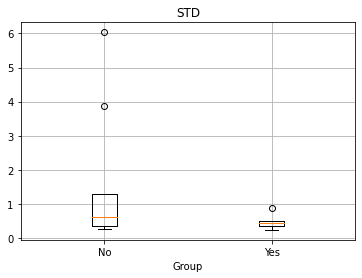

0.12891783016596906


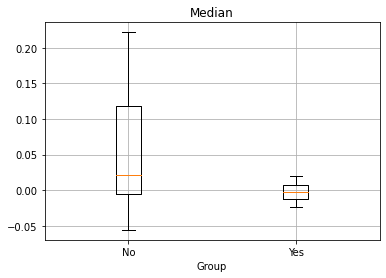

0.053859513815403694


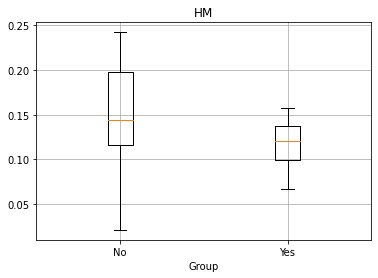

0.42290308589315173


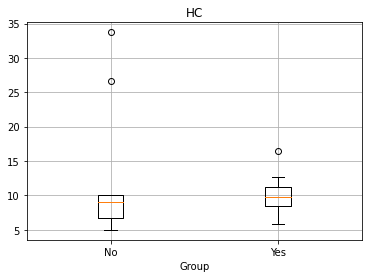

0.5111616403320689


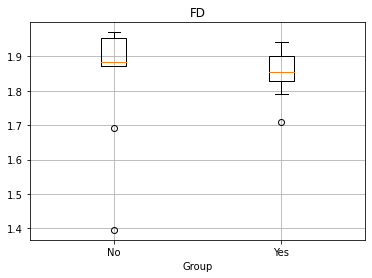

0.8324760363116652


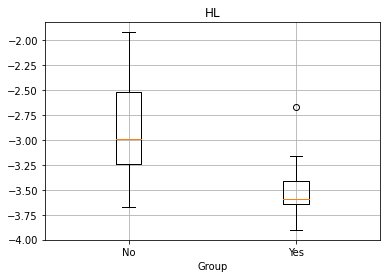

0.016016263507669583


In [96]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallm0[:,i], mallm1[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallm0[:,i], mallm1[:,i])
    print(p_value)

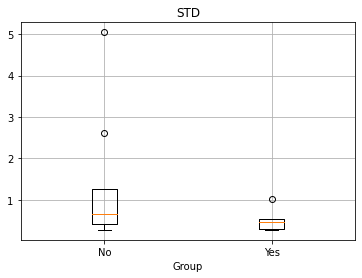

0.12940521142079864


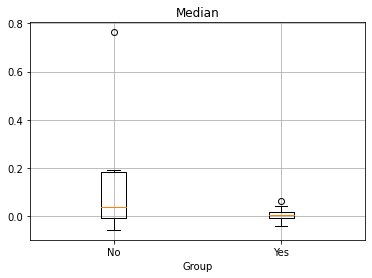

0.1899112939471562


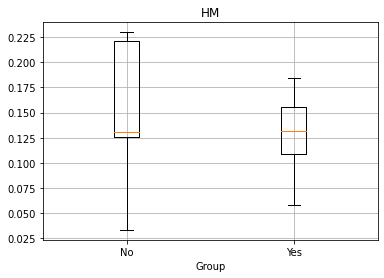

0.4805910734274289


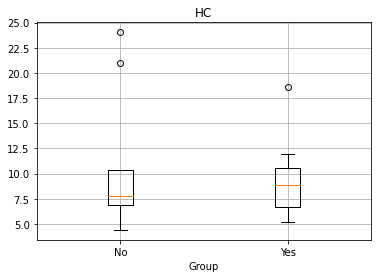

0.7146816766279156


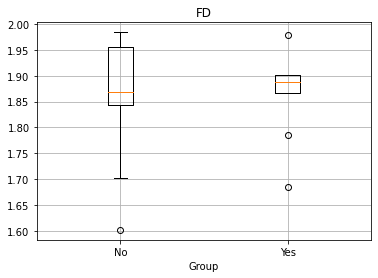

0.9277951903931684


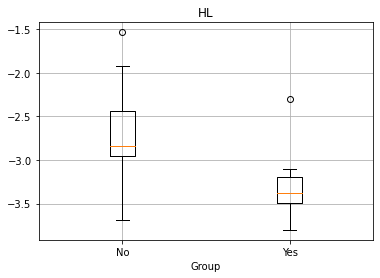

0.03967107953506784


In [97]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallm0fp[:,i], mallm1fp[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallm0fp[:,i], mallm1fp[:,i])
    print(p_value)

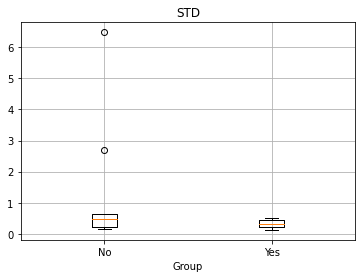

0.18371693068357875


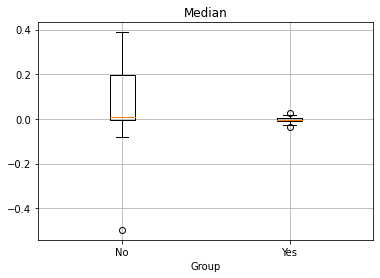

0.5690970619585265


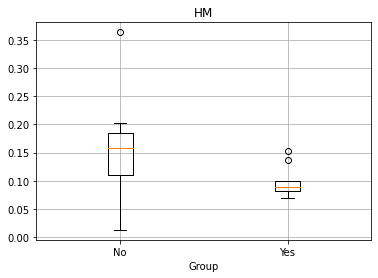

0.17434419216193145


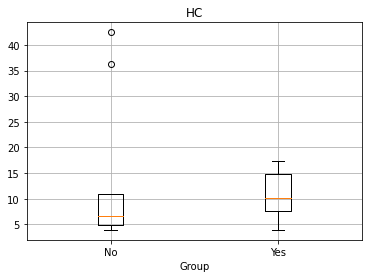

0.6314822265425407


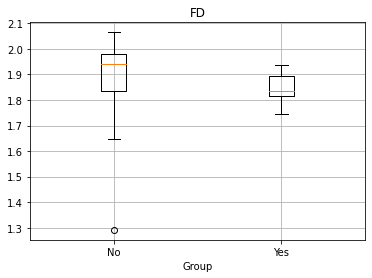

0.9949626989128673


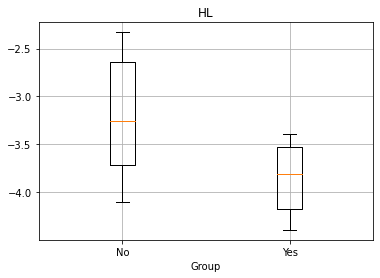

0.016233693740942856


In [98]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallm0sf[:,i], mallm1sf[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallm0sf[:,i], mallm1sf[:,i])
    print(p_value)

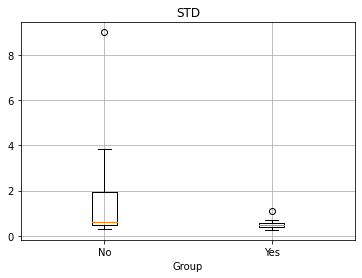

0.15083103436542844


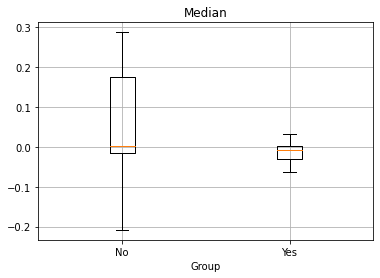

0.25777395353876115


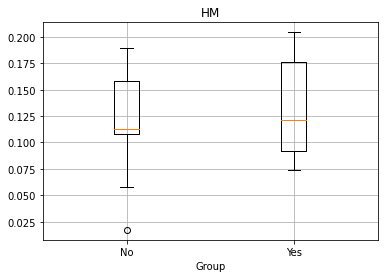

0.7531853073695884


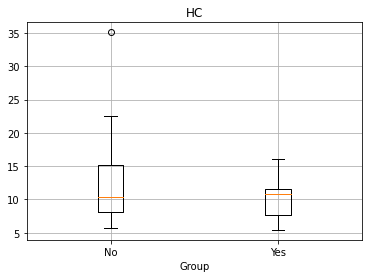

0.2823094413687726


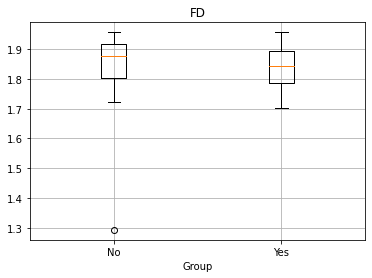

0.6007266210267903


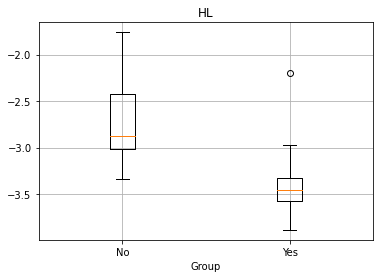

0.023038771098859618


In [99]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallm0re[:,i], mallm1re[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallm0re[:,i], mallm1re[:,i])
    print(p_value)

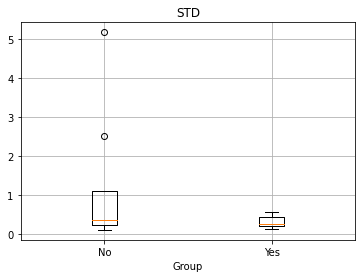

0.15851264096108728


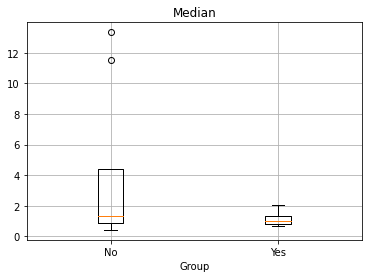

0.11087959005295549


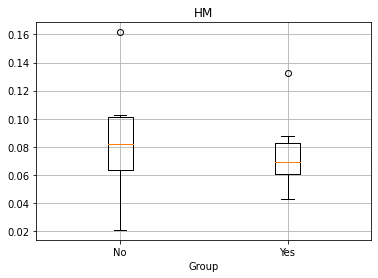

0.677113955953311


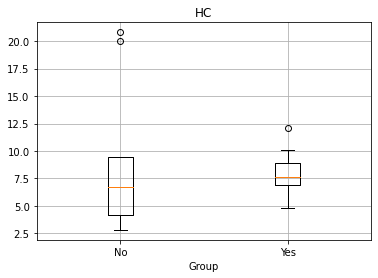

0.6517502171997971


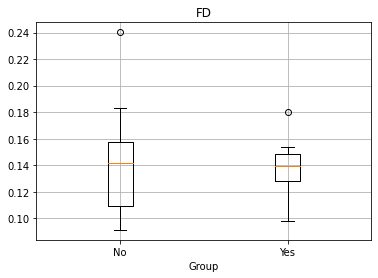

0.6212876827106006


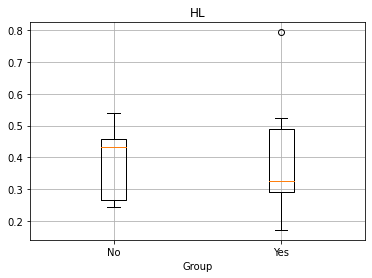

0.9818184705618991


In [100]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallm0[:,i], sallm1[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallm0[:,i], sallm1[:,i])
    print(p_value)

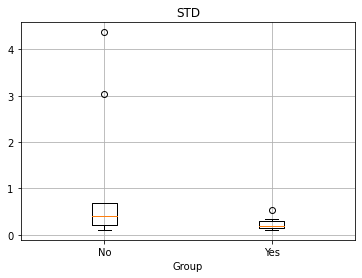

0.12597586030301555


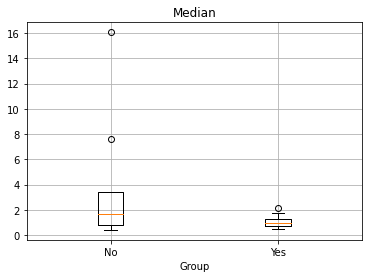

0.14098963162747663


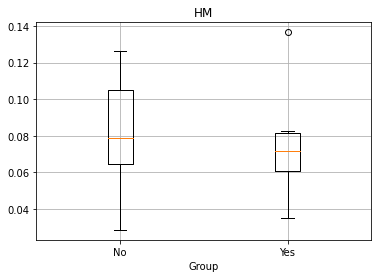

0.7486865553041306


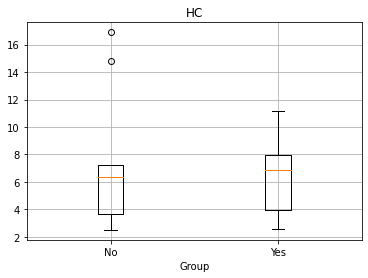

0.6056019899786256


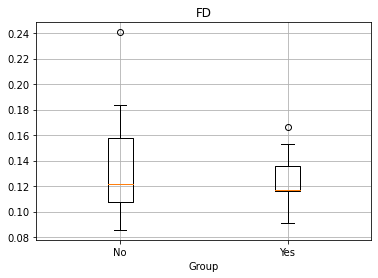

0.4960728313298277


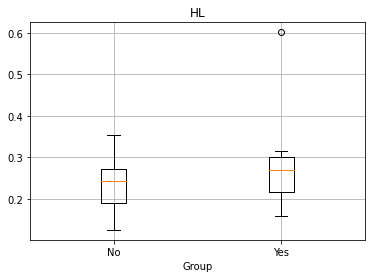

0.35289479369212406


In [101]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallm0fp[:,i], sallm1fp[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallm0fp[:,i], sallm1fp[:,i])
    print(p_value)

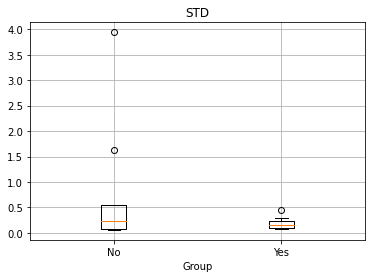

0.19039590685186586


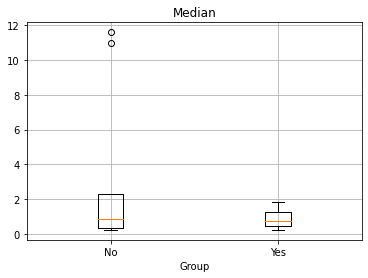

0.16196973954914984


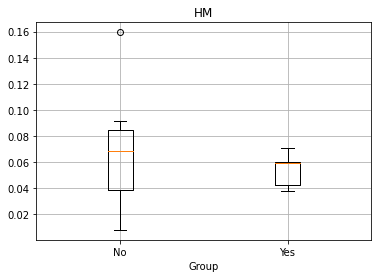

0.3719433897160067


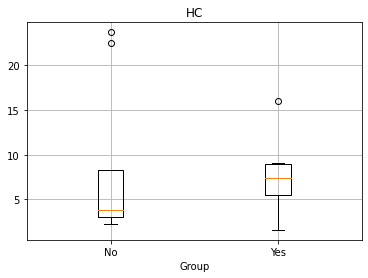

0.7298633997757051


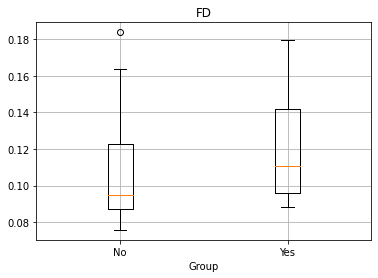

0.6015852478302259


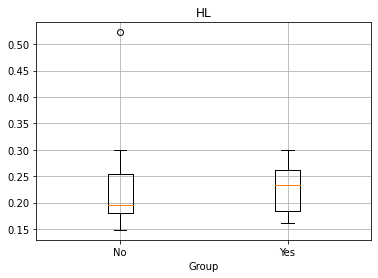

0.7925199313883915


In [102]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallm0sf[:,i], sallm1sf[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallm0sf[:,i], sallm1sf[:,i])
    print(p_value)

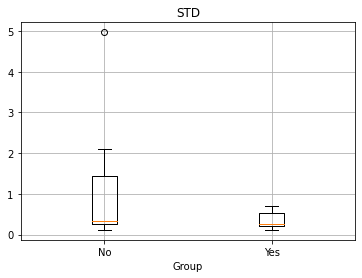

0.1761268576059893


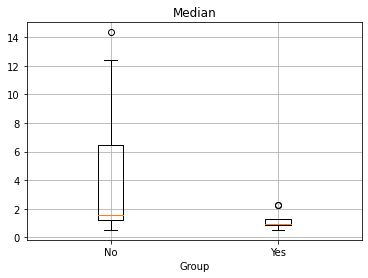

0.0875090081653414


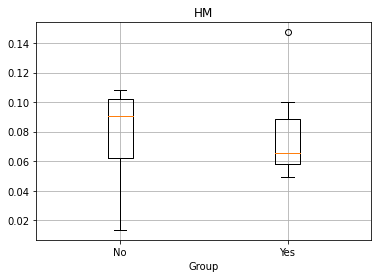

0.9160293367240284


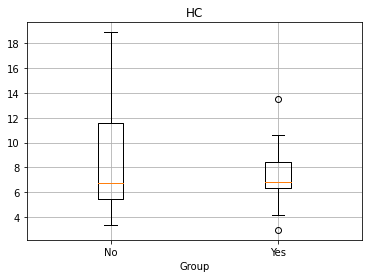

0.47479597750216807


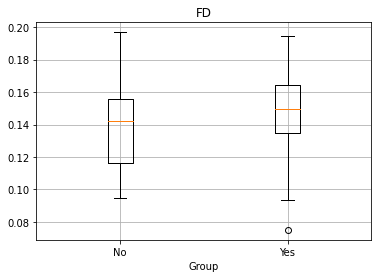

0.8676383363220312


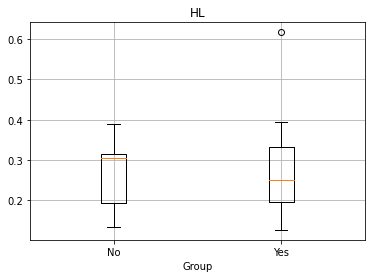

0.6459137693508684


In [103]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallm0re[:,i], sallm1re[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallm0re[:,i], sallm1re[:,i])
    print(p_value)

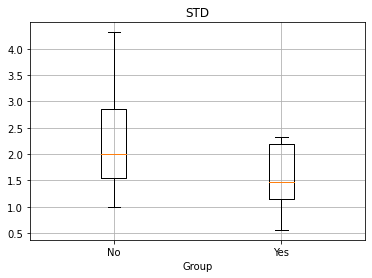

0.1026012770461017


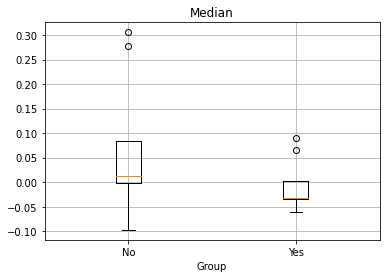

0.2099421472408401


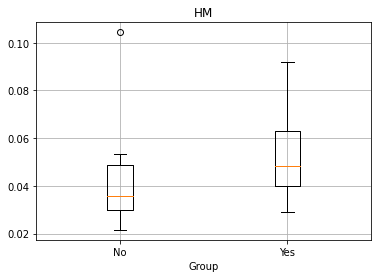

0.3988776841654532


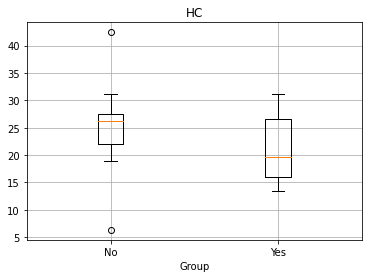

0.3181283012341271


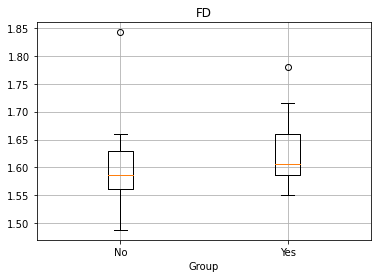

0.46816862417895566


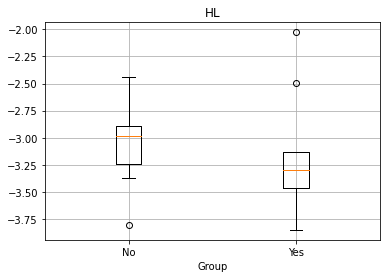

0.6879212489319579


In [104]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallc0[:,i], mallc1[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallc0[:,i], mallc1[:,i])
    print(p_value)

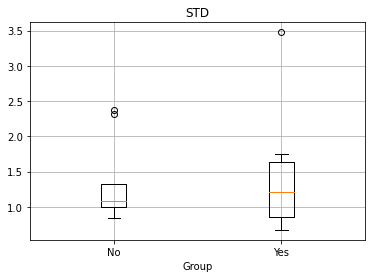

0.7574412204964465


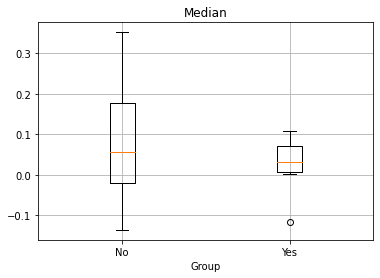

0.2588123750610777


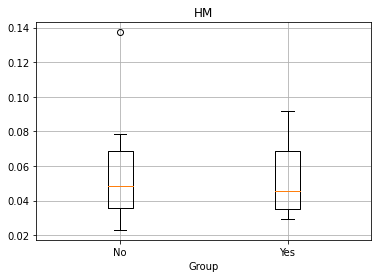

0.7101580246009747


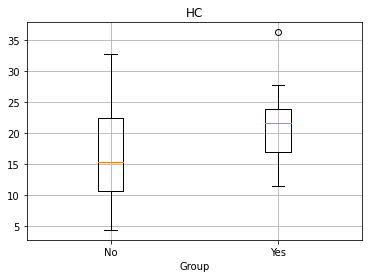

0.34899488237874365


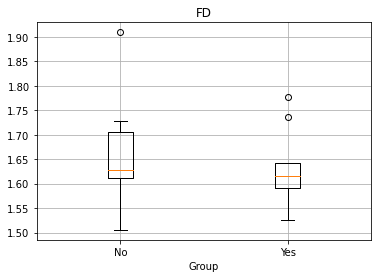

0.5249190478814814


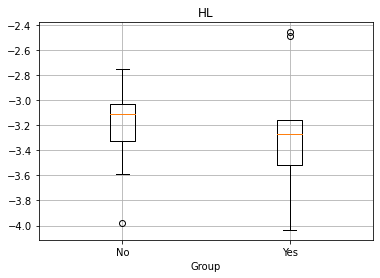

0.8725001036152159


In [105]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallc0fp[:,i], mallc1fp[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallc0fp[:,i], mallc1fp[:,i])
    print(p_value)

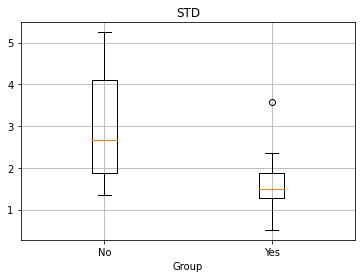

0.03048655219378183


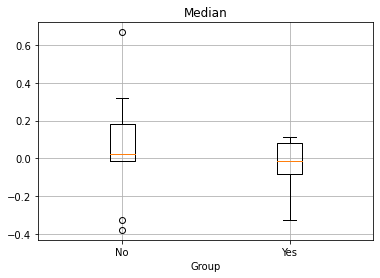

0.39892176530427703


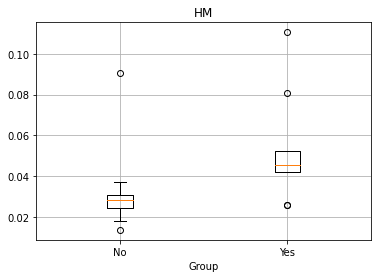

0.11515268275668683


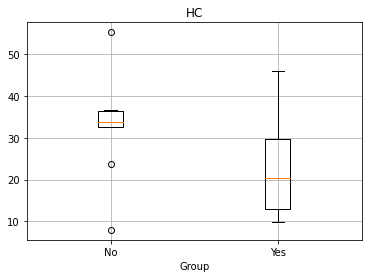

0.11137482028889922


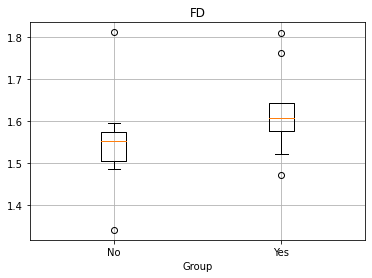

0.18054999789826245


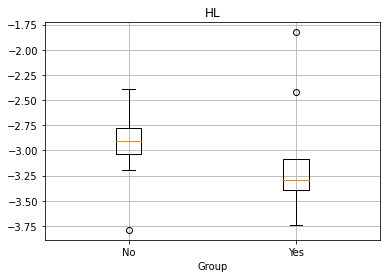

0.5235749355080388


In [106]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallc0sf[:,i], mallc1sf[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallc0sf[:,i], mallc1sf[:,i])
    print(p_value)

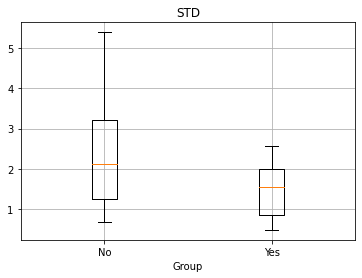

0.11145341967201657


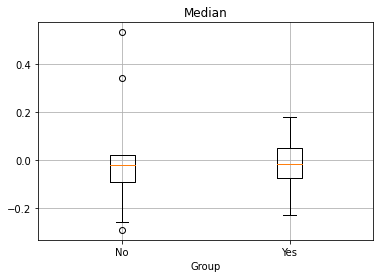

0.716417935322136


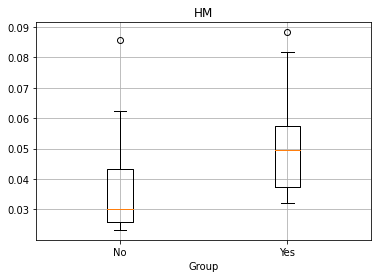

0.2020678589019141


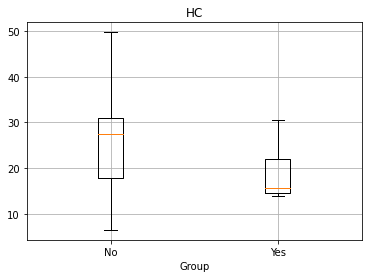

0.21801118821739232


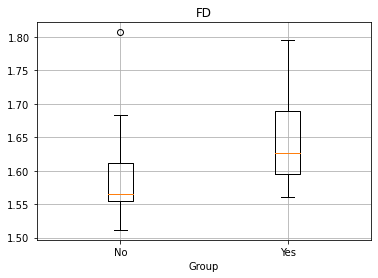

0.2511413729146572


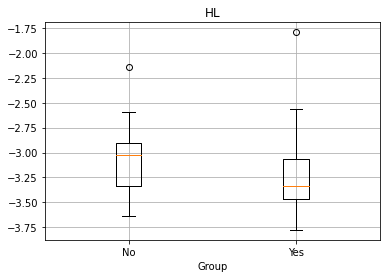

0.7378614895755375


In [107]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([mallc0re[:,i], mallc1re[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(mallc0re[:,i], mallc1re[:,i])
    print(p_value)

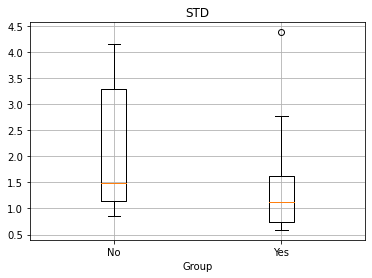

0.3132410093689131


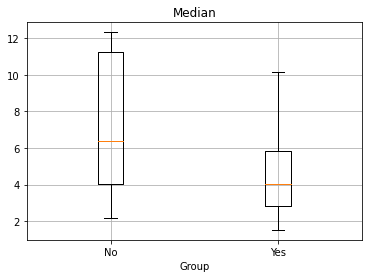

0.1840854571608319


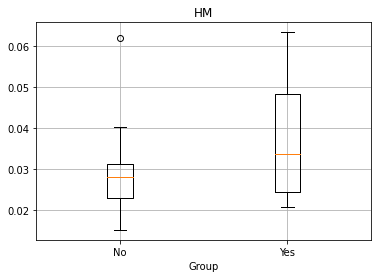

0.35584094138338873


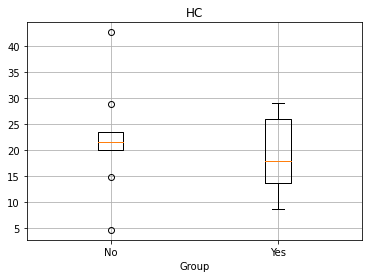

0.47577392747157077


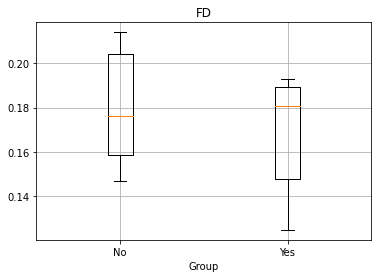

0.5233441728807526


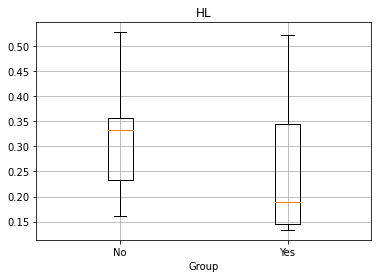

0.5157447863041331


In [108]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallc0[:,i], sallc1[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallc0[:,i], sallc1[:,i])
    print(p_value)

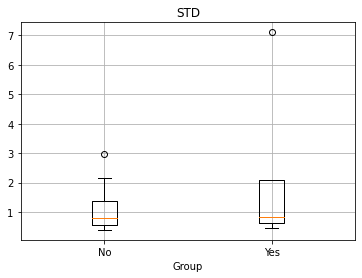

0.49234463521526806


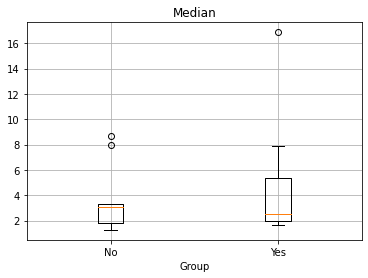

0.5191869268010134


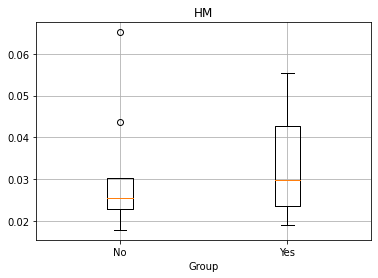

0.6701844717747483


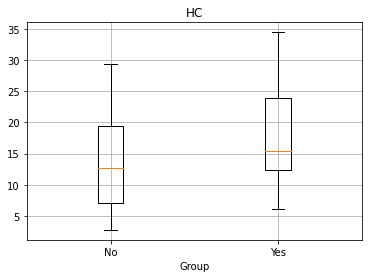

0.4303555347031296


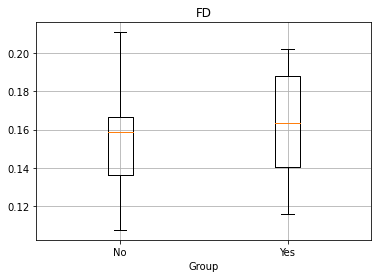

0.49589650383223793


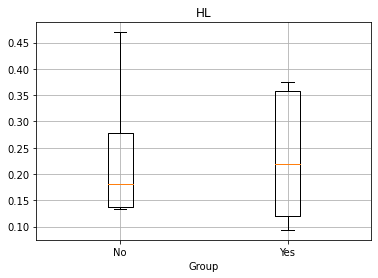

0.8203316093885912


In [109]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallc0fp[:,i], sallc1fp[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallc0fp[:,i], sallc1fp[:,i])
    print(p_value)

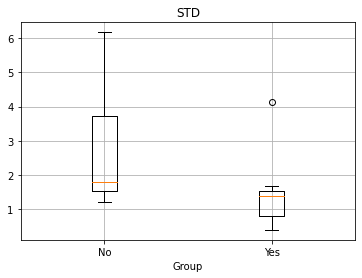

0.0682909428309246


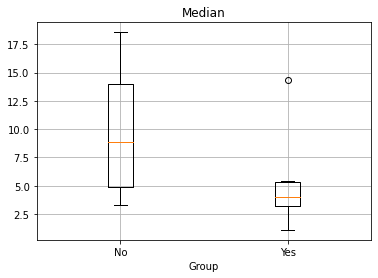

0.04454058392477824


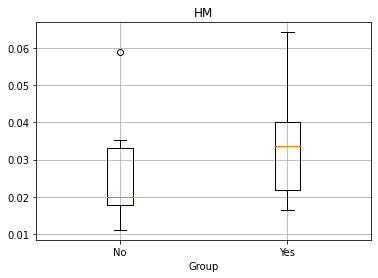

0.21613795823789328


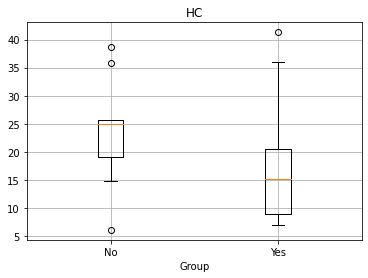

0.32623368383294193


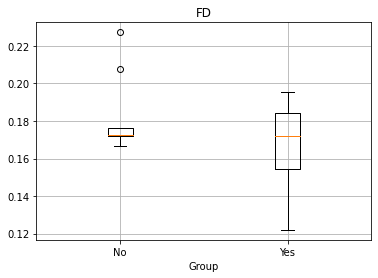

0.1396968737770607


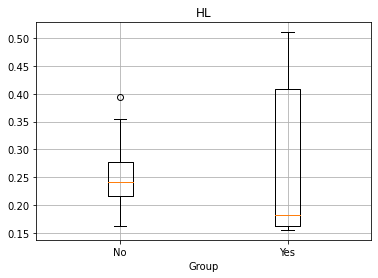

0.840883216822605


In [110]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallc0sf[:,i], sallc1sf[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallc0sf[:,i], sallc1sf[:,i])
    print(p_value)

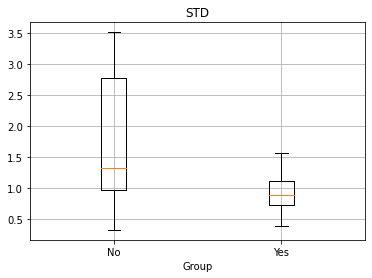

0.04872871786534364


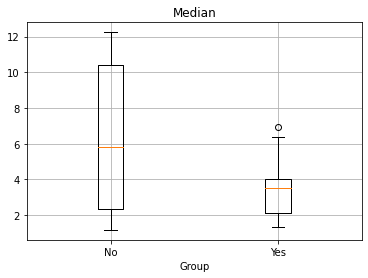

0.07651909520071815


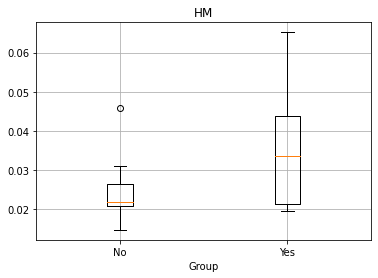

0.11995023557175279


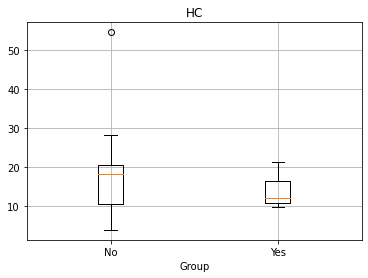

0.2632566218976543


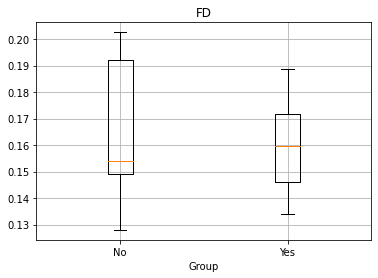

0.5710981668618396


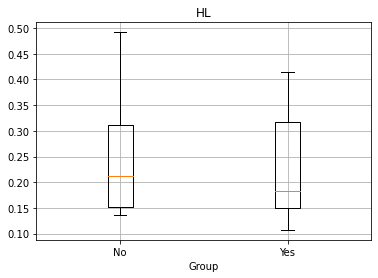

0.7501336082656375


In [111]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([sallc0re[:,i], sallc1re[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(sallc0re[:,i], sallc1re[:,i])
    print(p_value)

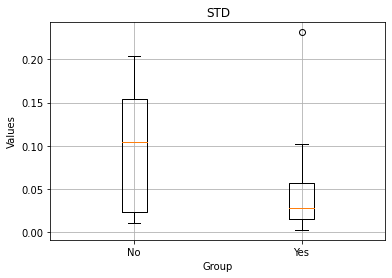

0.2785877084154877


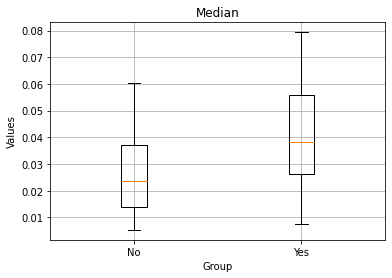

0.18094213489061733


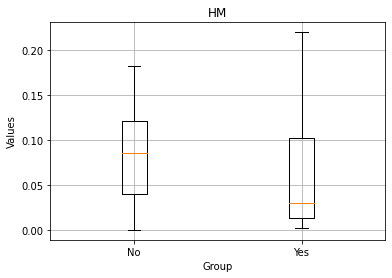

0.5440261851152031


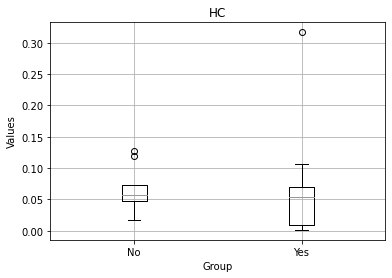

0.8207052616551407


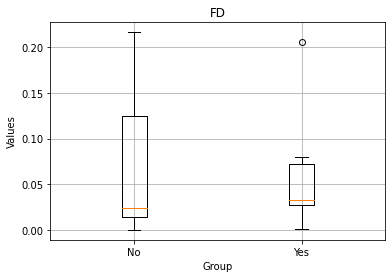

0.8044274056642484


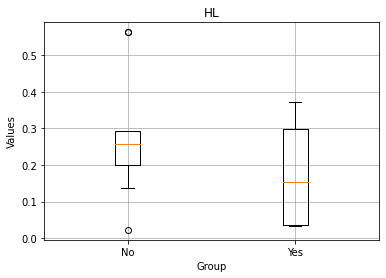

0.12603241265007478


In [112]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0all[:,i], corr1all[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0all[:,i], corr1all[:,i])
    print(p_value)


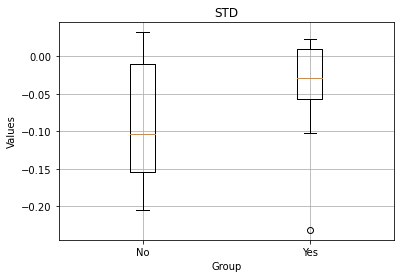

0.3414950877827211


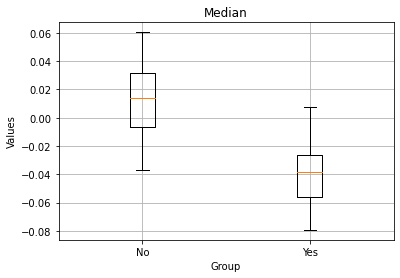

0.001913204136250123


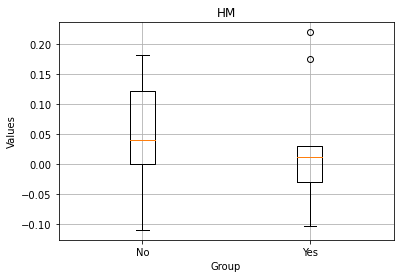

0.7636705738111587


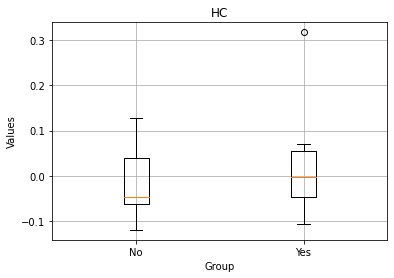

0.38602301139295736


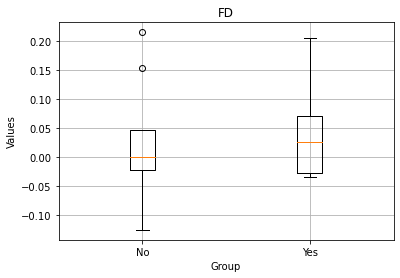

0.8013398073108693


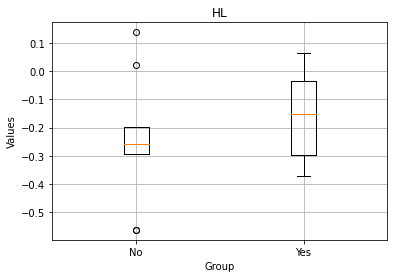

0.2725321320603959


In [113]:
for i in range(len(corrall[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allo[:,i], corr1allo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allo[:,i], corr1allo[:,i])
    print(p_value)


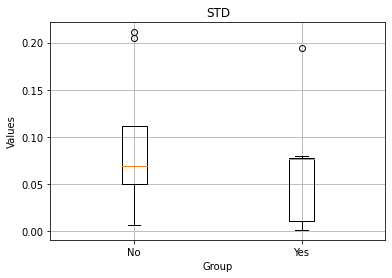

0.3906449260980638


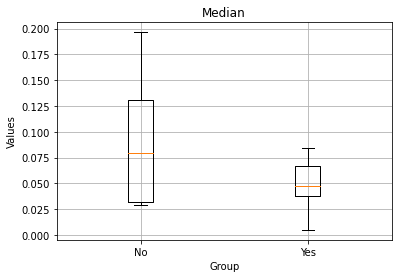

0.09888887640153408


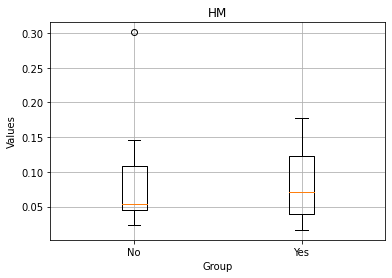

0.751801304398991


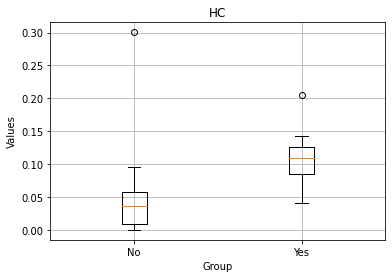

0.23853005889680678


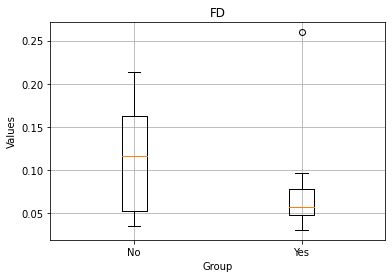

0.3638786418540505


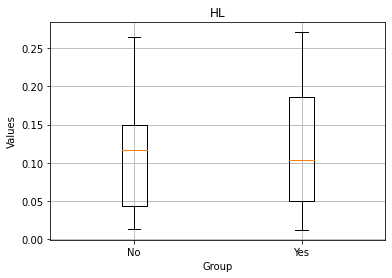

0.7914465045743484


In [114]:
for i in range(len(corralld[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0alld[:,i], corr1alld[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0alld[:,i], corr1alld[:,i])
    print(p_value)

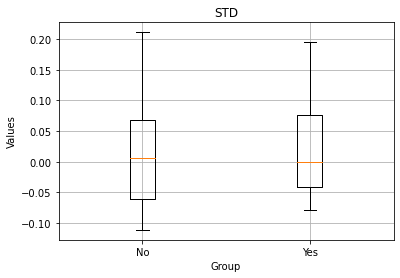

0.7862752735937394


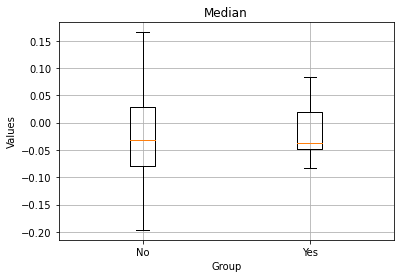

0.7296877308188492


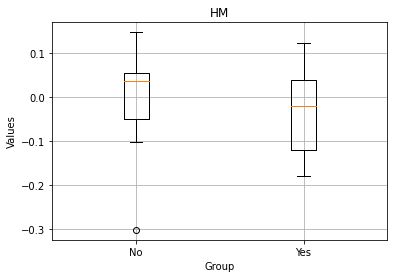

0.6454583511210257


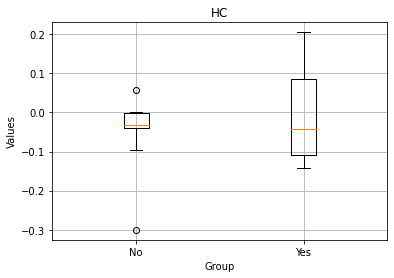

0.4120041409513924


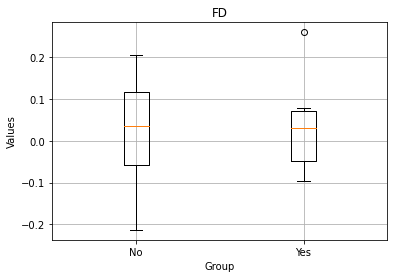

0.708196163916154


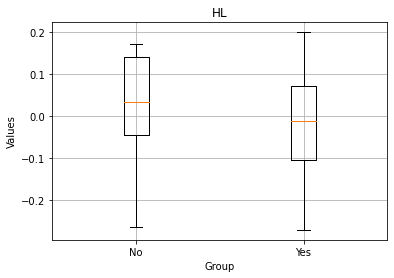

0.7620227444018136


In [115]:
for i in range(len(corralldo[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0alldo[:,i], corr1alldo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0alldo[:,i], corr1alldo[:,i])
    print(p_value)

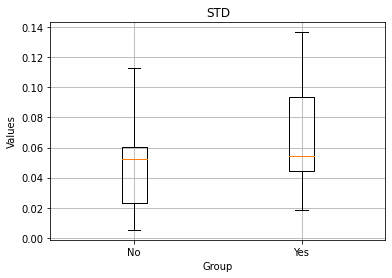

0.34978816411180136


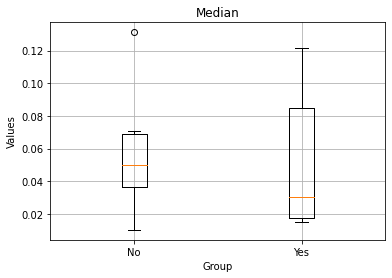

0.8656009377473416


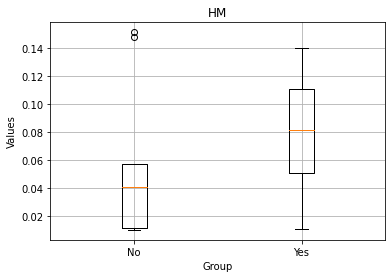

0.2606972327854725


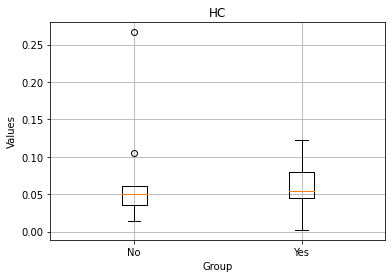

0.677141696249798


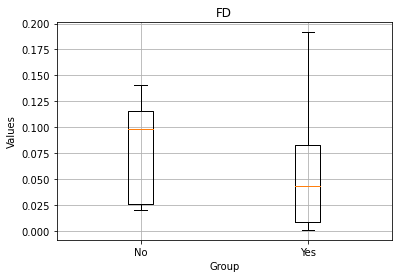

0.6291557169149102


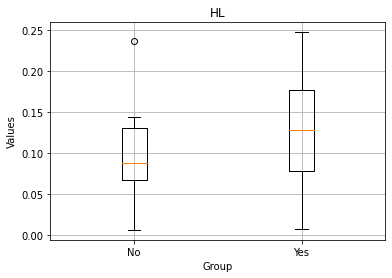

0.4441683149857023


In [116]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0alldd[:,i], corr1alldd[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0alldd[:,i], corr1alldd[:,i])
    print(p_value)

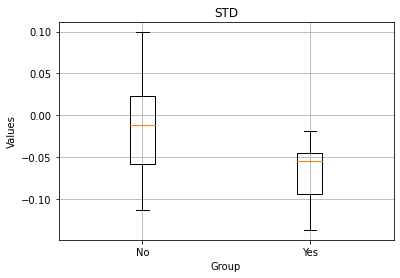

0.0555583669893756


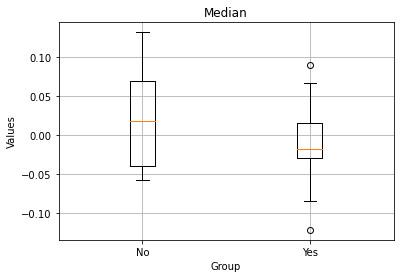

0.2868331368828625


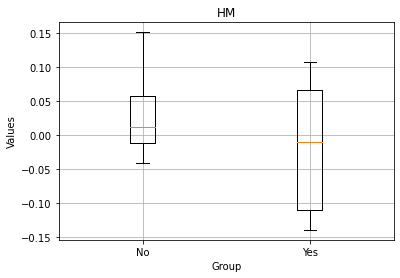

0.1938408692156346


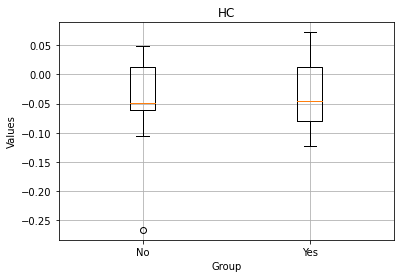

0.59266128757144


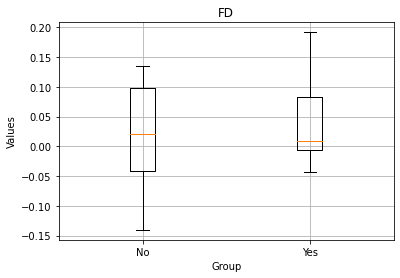

0.42552945930553143


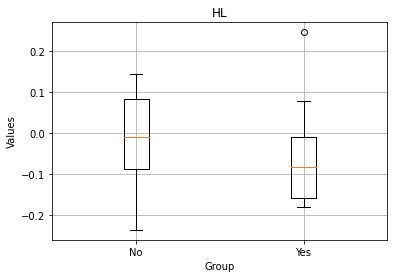

0.6849055065260858


In [117]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allddo[:,i], corr1allddo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allddo[:,i], corr1allddo[:,i])
    print(p_value)

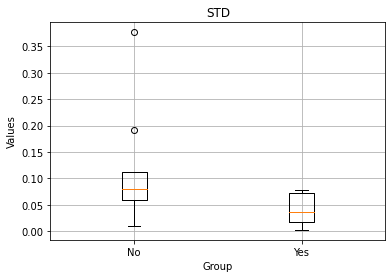

0.051311464085668


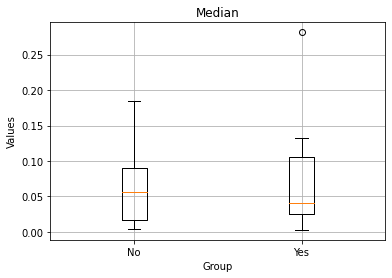

0.7979644305746485


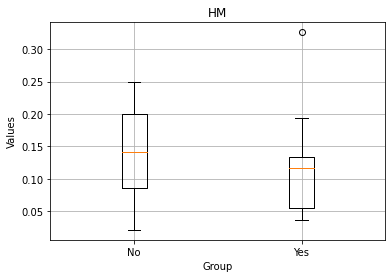

0.8607082963507333


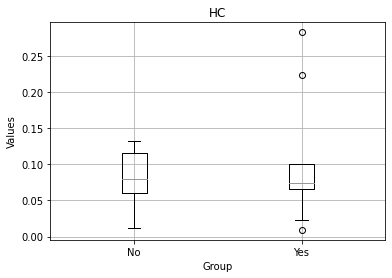

0.45538696805458667


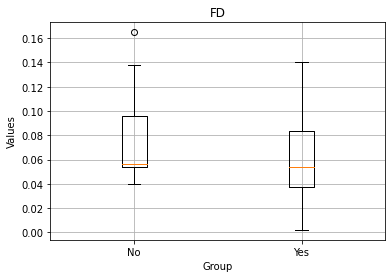

0.33106492732886417


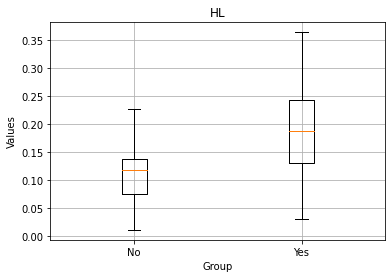

0.0913388770220804


In [118]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allfp[:,i], corr1allfp[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allfp[:,i], corr1allfp[:,i])
    print(p_value)

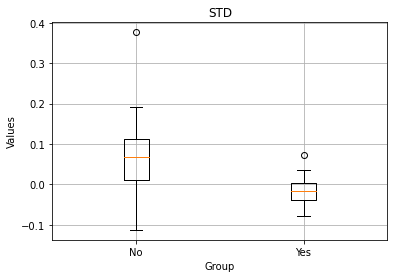

0.07513371232025456


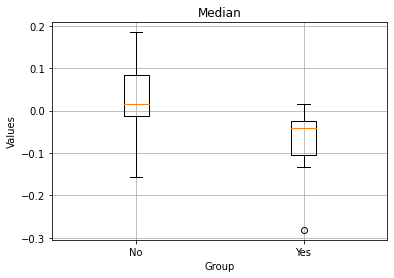

0.03219326085799244


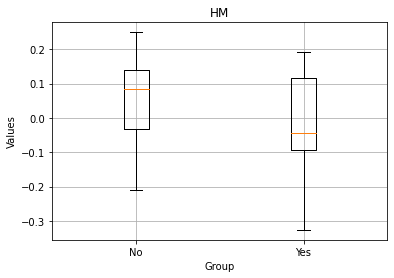

0.5527984429436326


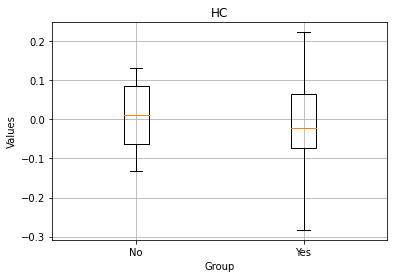

0.6995684660432504


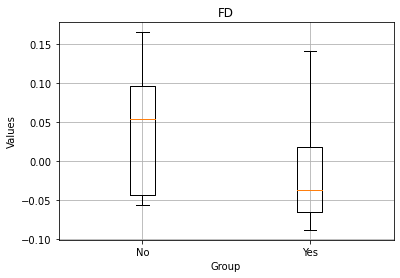

0.1366729230317163


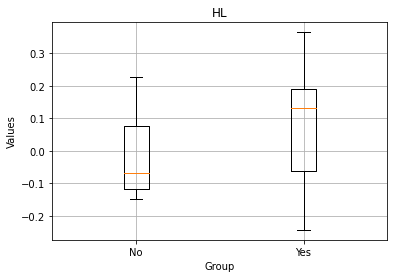

0.22925580791617073


In [119]:
for i in range(len(corrallddo[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allfpo[:,i], corr1allfpo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allfpo[:,i], corr1allfpo[:,i])
    print(p_value)

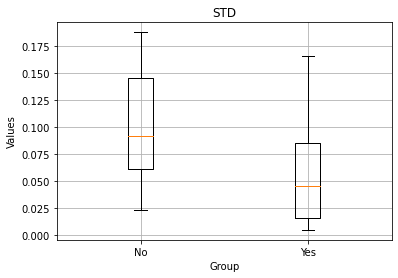

0.16346927983948165


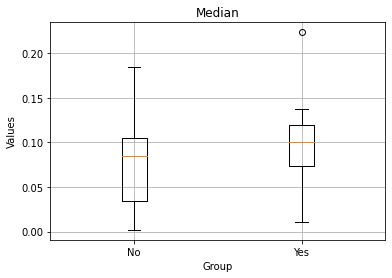

0.3316182799228853


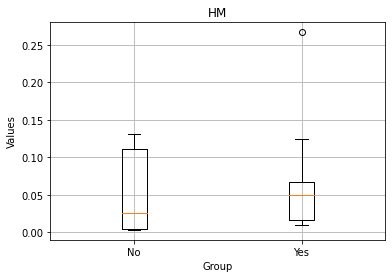

0.6721944788600742


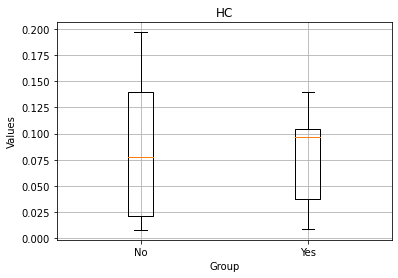

0.7011288649175313


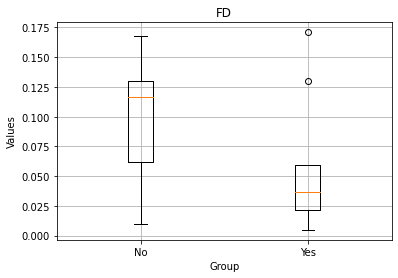

0.11244243909105997


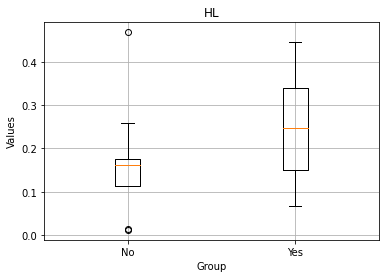

0.22915843775774786


In [120]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allre[:,i], corr1allre[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allre[:,i], corr1allre[:,i])
    print(p_value)

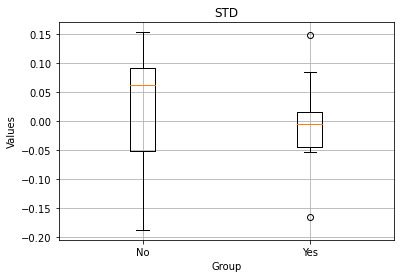

0.6697373244167144


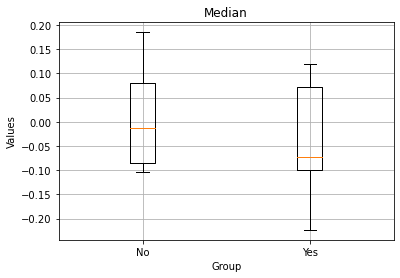

0.4307297306316613


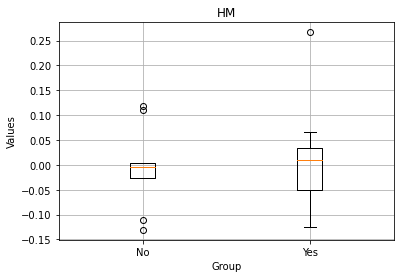

0.6475617838348129


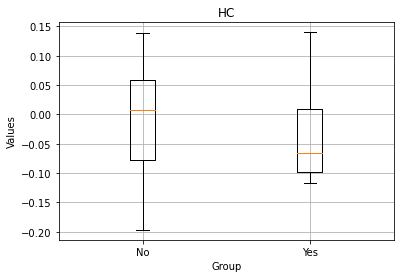

0.7402411156771587


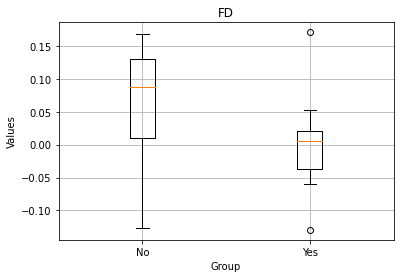

0.18792712149826332


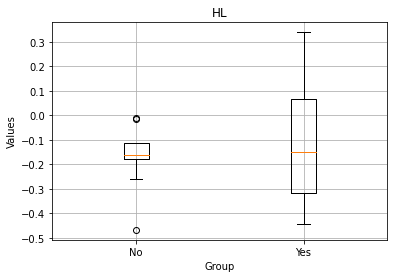

0.634330679207773


In [121]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allreo[:,i], corr1allreo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allreo[:,i], corr1allreo[:,i])
    print(p_value)

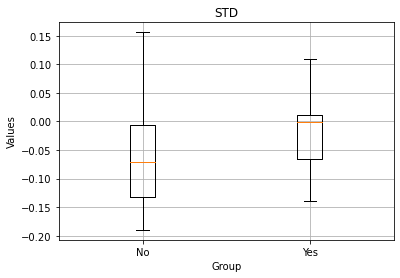

0.48192259782683633


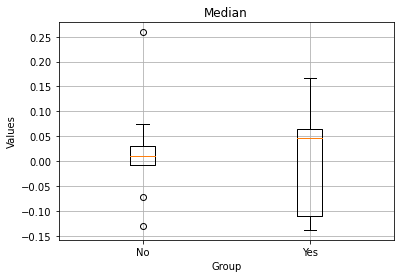

0.6701388797508478


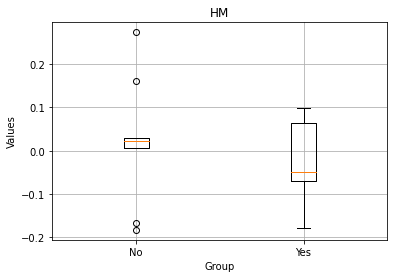

0.37535581492546843


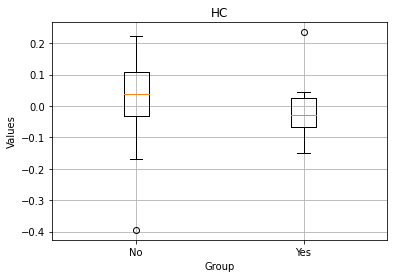

0.8894495265709264


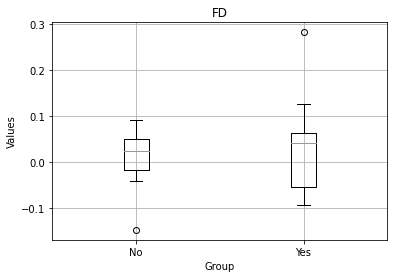

0.4430943510053271


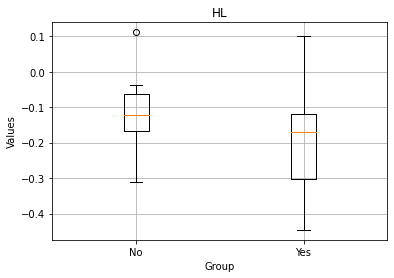

0.3968762852522505


In [122]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allsfo[:,i], corr1allsfo[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allsfo[:,i], corr1allsfo[:,i])
    print(p_value)

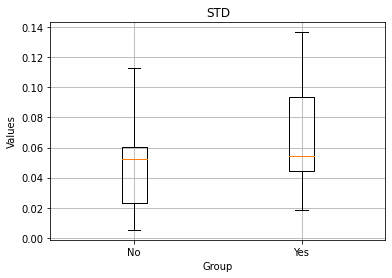

0.34978816411180136


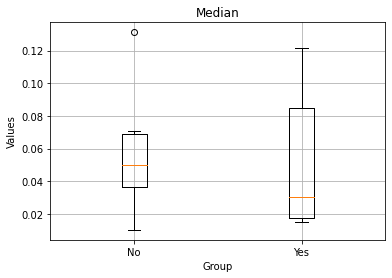

0.8656009377473416


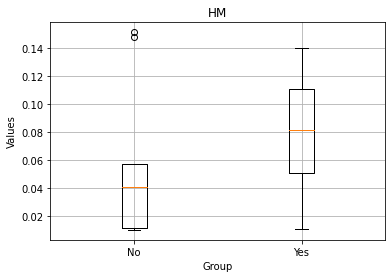

0.2606972327854725


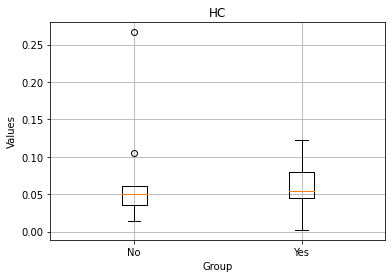

0.677141696249798


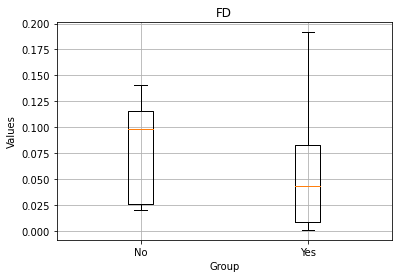

0.6291557169149102


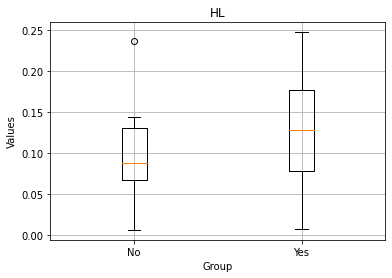

0.4441683149857023


In [123]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allddr[:,i], corr1allddr[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allddr[:,i], corr1allddr[:,i])
    print(p_value)

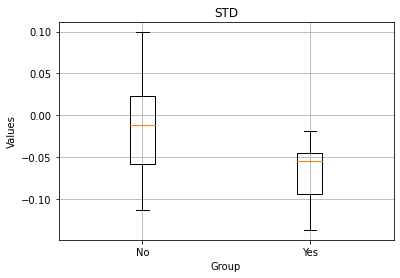

0.0555583669893756


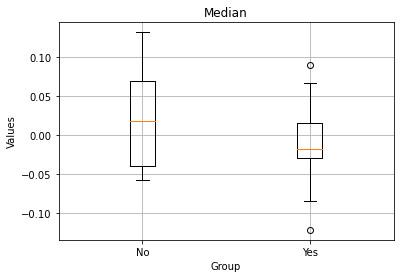

0.2868331368828625


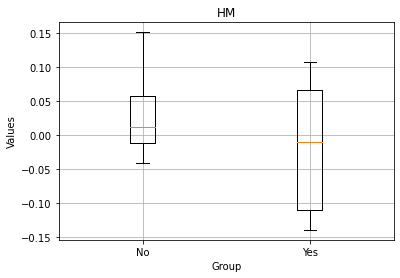

0.1938408692156346


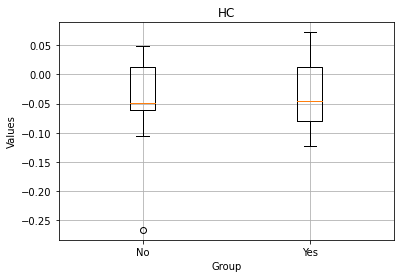

0.59266128757144


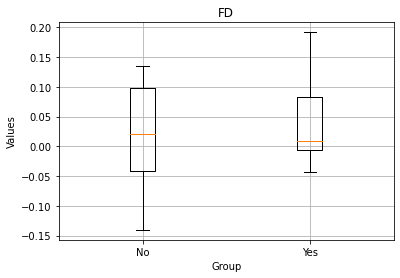

0.42552945930553143


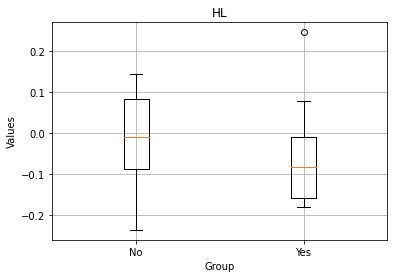

0.6849055065260858


In [124]:
for i in range(len(corralldd[0,:])):
    title=['STD','Median','HM','HC','FD','HL','SE']
    plt.boxplot([corr0allddro[:,i], corr1allddro[:,i]], labels=['No', 'Yes'])
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(title[i])
    plt.grid(True)
    plt.show()
    t_statistic, p_value = ttest_ind(corr0allddro[:,i], corr1allddro[:,i])
    print(p_value)

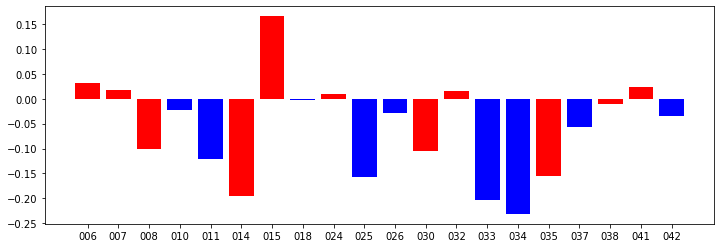

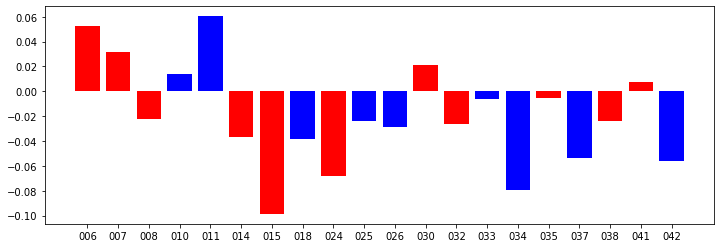

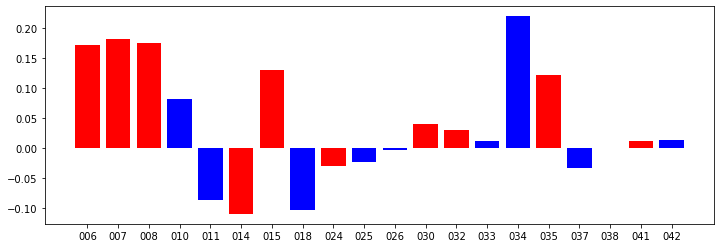

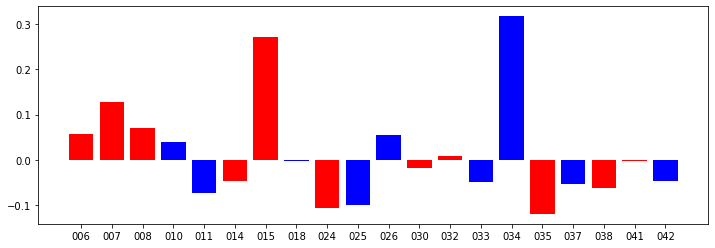

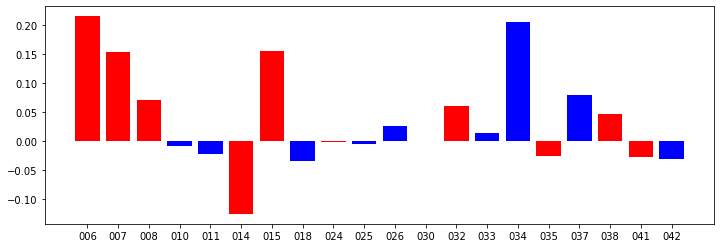

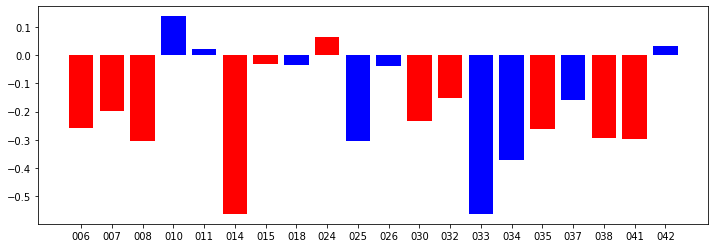

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [125]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,0],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,1],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,2],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,3],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,4],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,5],color=colorstd)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corrallo[:,6],color=colorstd)
#plt.show()

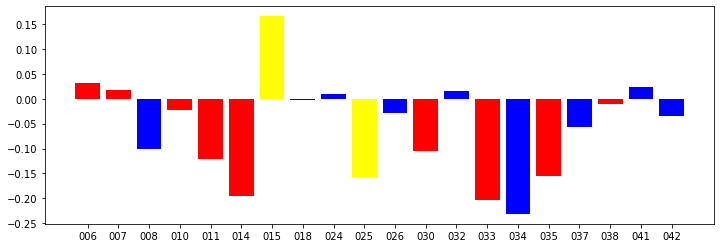

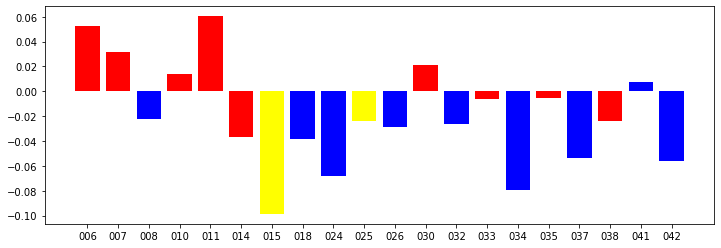

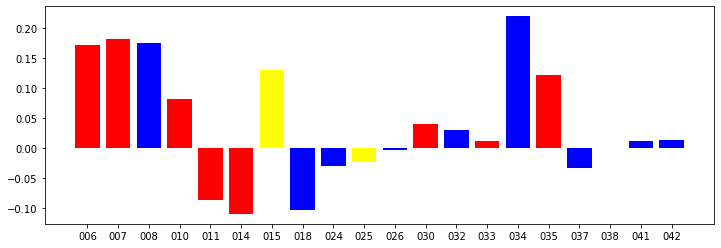

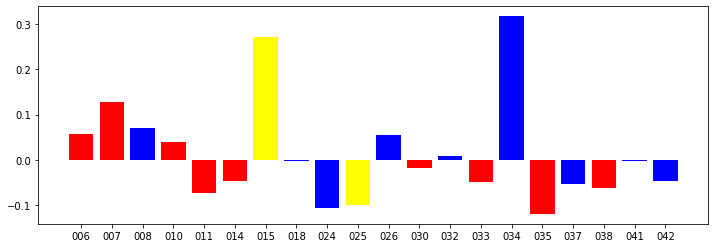

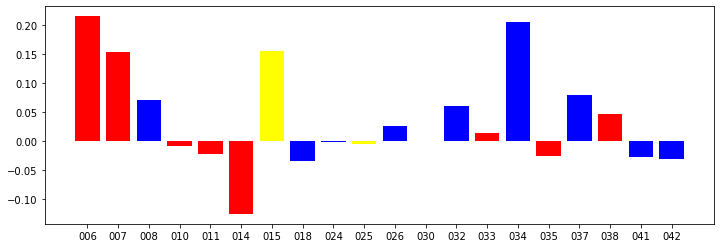

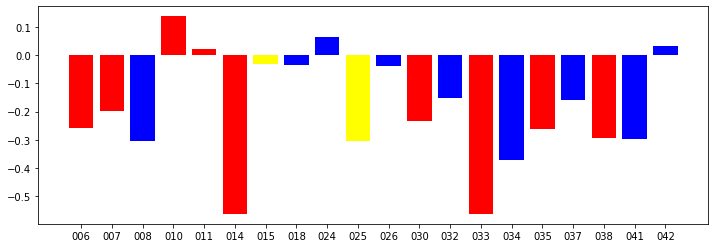

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [126]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,0],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,1],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,2],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,3],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,4],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallo[:,5],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corrallo[:,6],color=colors)
#plt.show()

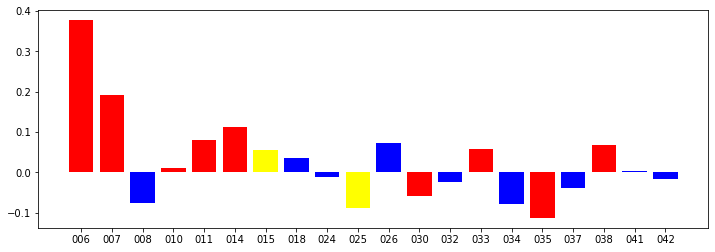

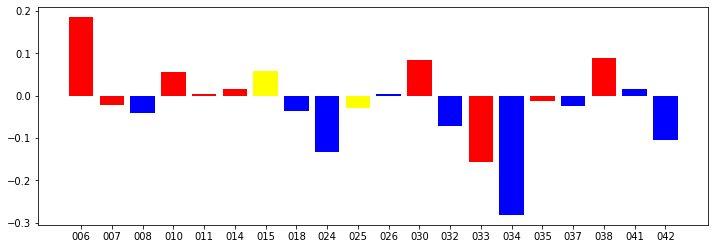

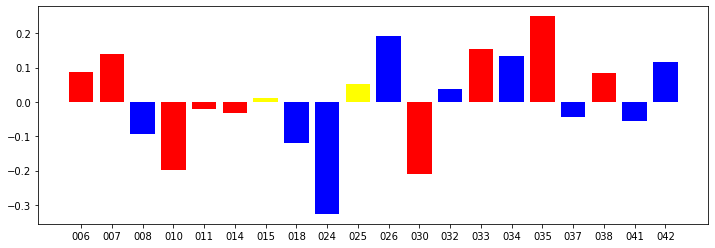

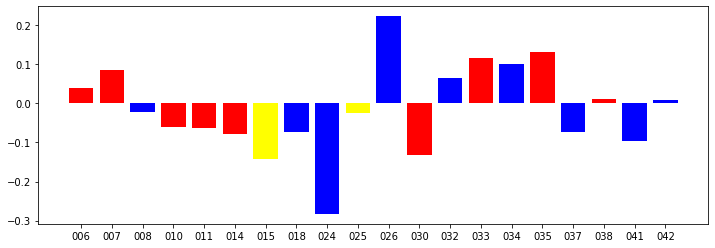

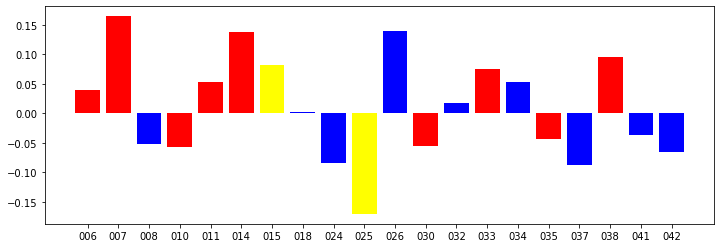

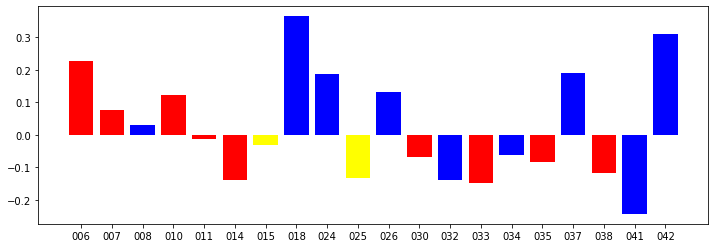

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [127]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,0],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,1],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,2],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,3],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,4],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallfpo[:,5],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corrallfpo[:,6],color=colors)
#plt.show()

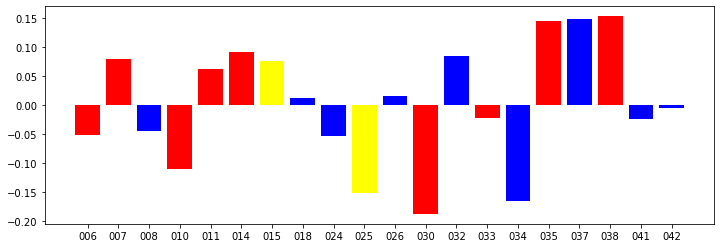

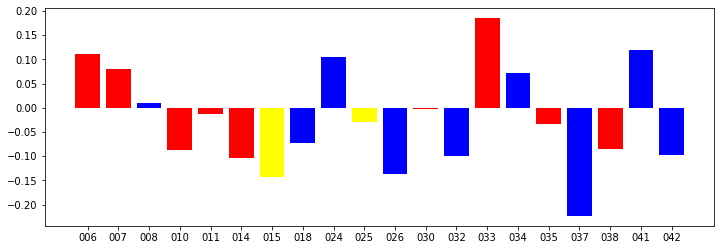

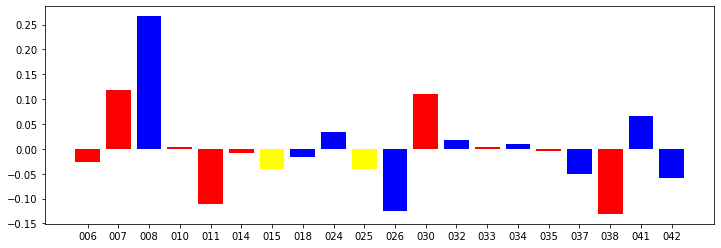

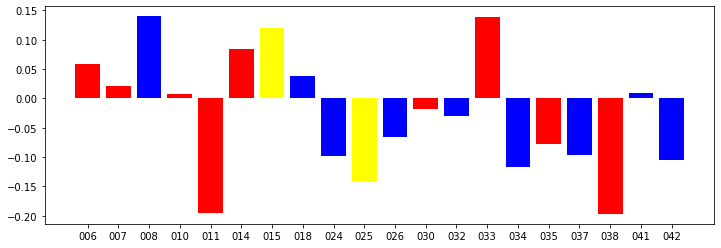

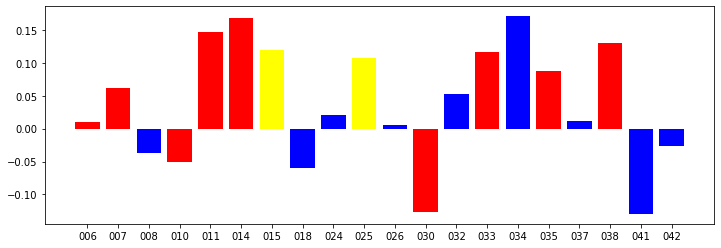

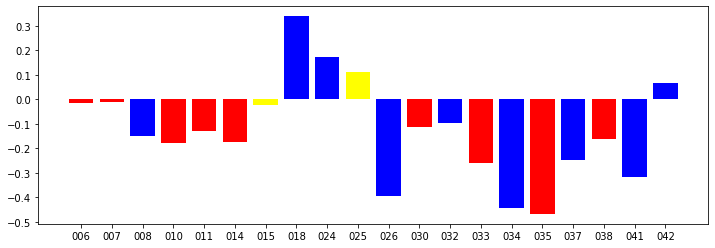

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [128]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,0],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,1],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,2],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,3],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,4],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallreo[:,5],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corrallreo[:,6],color=colors)
#plt.show()

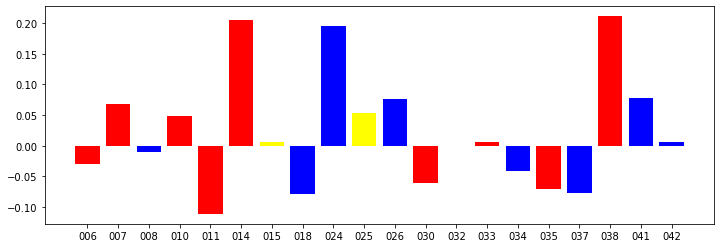

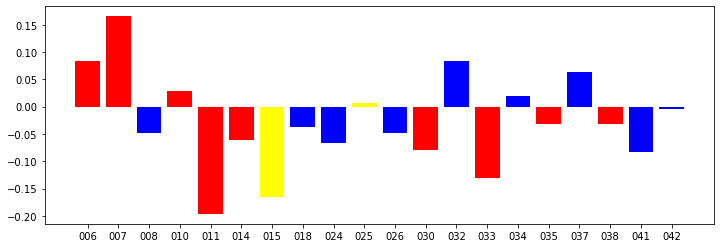

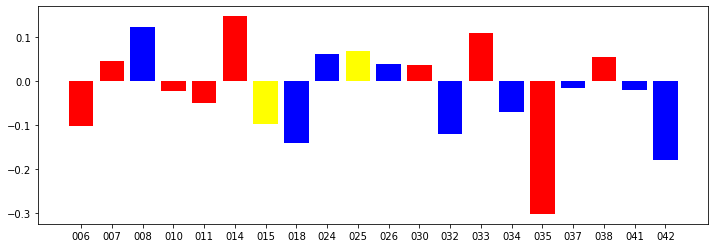

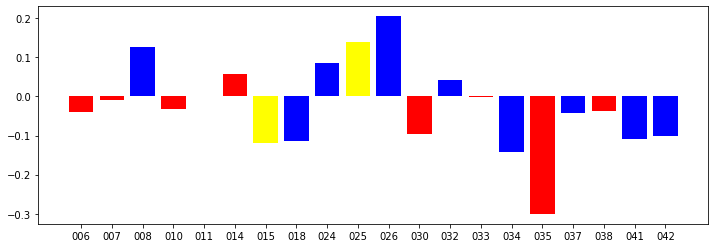

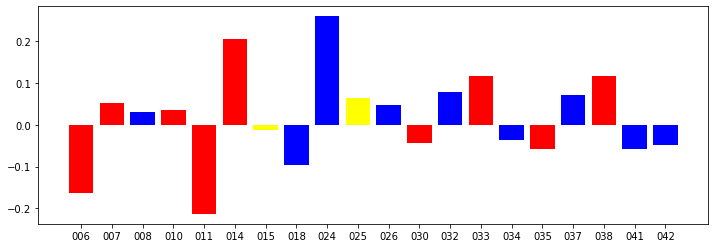

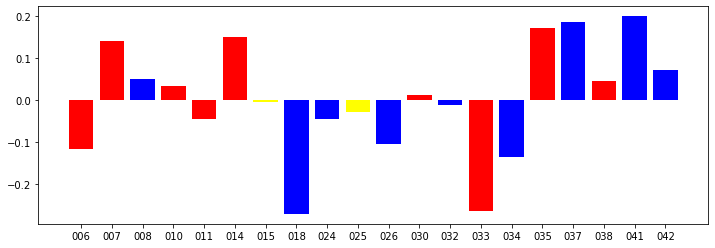

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [129]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,0],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,1],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,2],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,3],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,4],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corralldo[:,5],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corralldo[:,6],color=colors)
#plt.show()

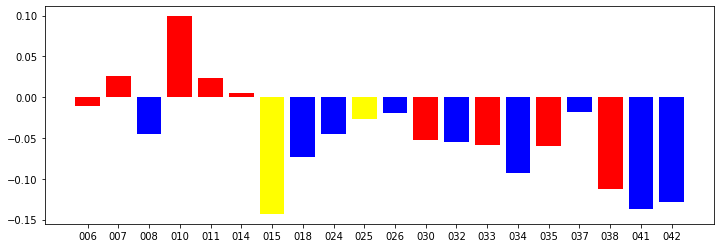

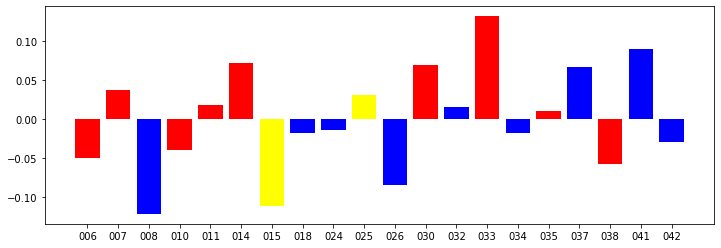

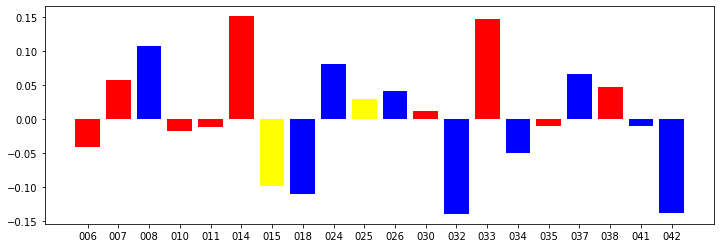

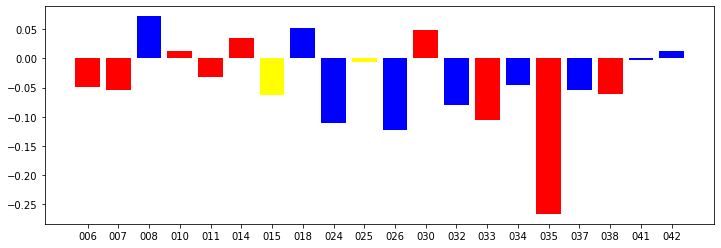

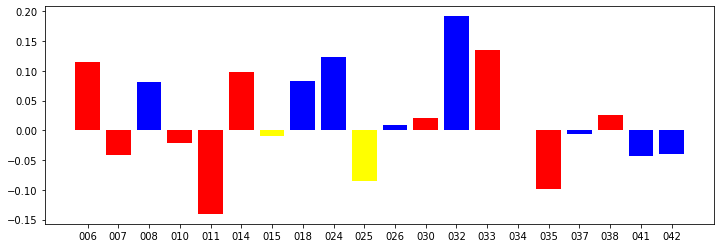

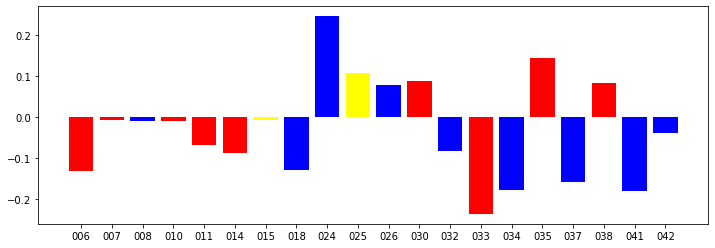

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [130]:
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,0],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,1],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,2],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,3],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,4],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(categories,corrallddo[:,5],color=colors)
plt.show()
plt.figure(figsize=(12, 4))
#plt.bar(categories,corrallddo[:,6],color=colors)
#plt.show()

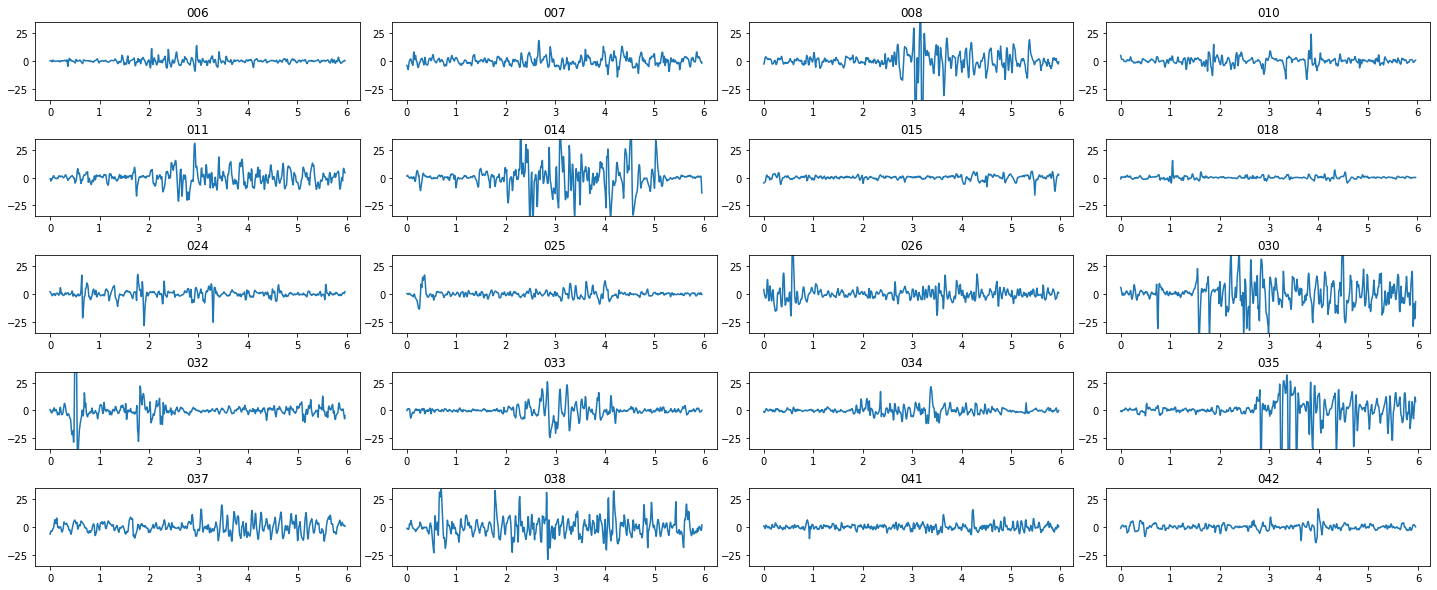

In [131]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatacdown)//4+(len(bdatacdown)%4>0)
for i in range(len(bdatacdown)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatacdown[i][0]))/2/60
    plt.plot(xlabel,bdatacdown[i][0])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-35,35)
    plt.title(filesfp[i][:3])

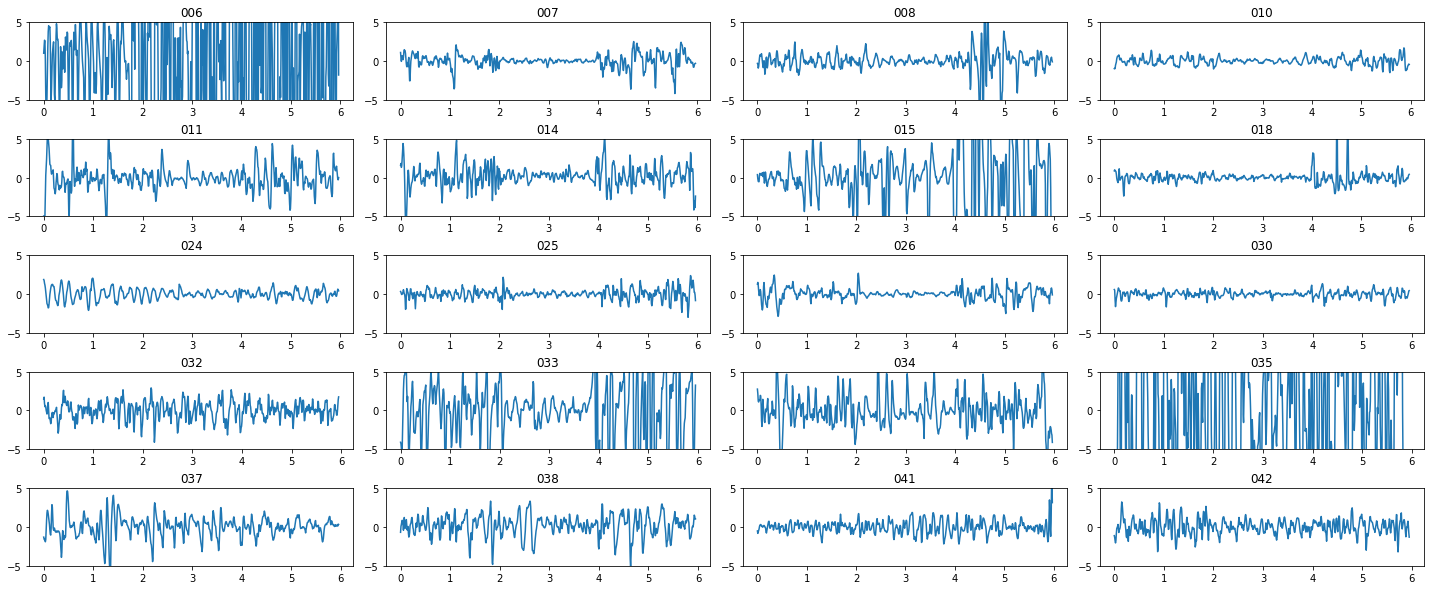

In [132]:
fig=plt.figure(figsize=(25,10))
num_rows = len(bdatamdown)//4+(len(bdatamdown)%4>0)
for i in range(len(bdatamdown)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(bdatamdown[i][0]))/2/60
    plt.plot(xlabel,bdatamdown[i][0])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-5,5)
    plt.title(filesfp[i][:3])

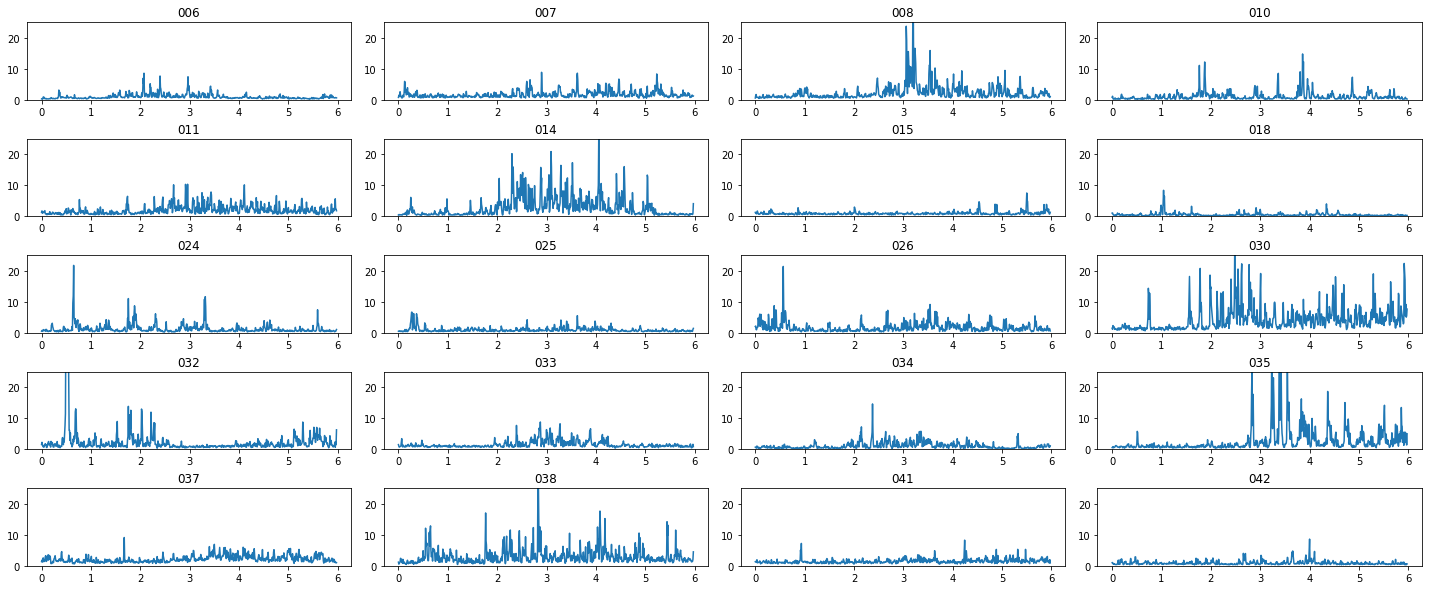

In [133]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datastdc)//4+(len(datastdc)%4>0)
for i in range(len(datastdc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datastdc[i,:]))/2/60
    plt.plot(xlabel,datastdc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,25)
    plt.title(filesfp[i][:3])

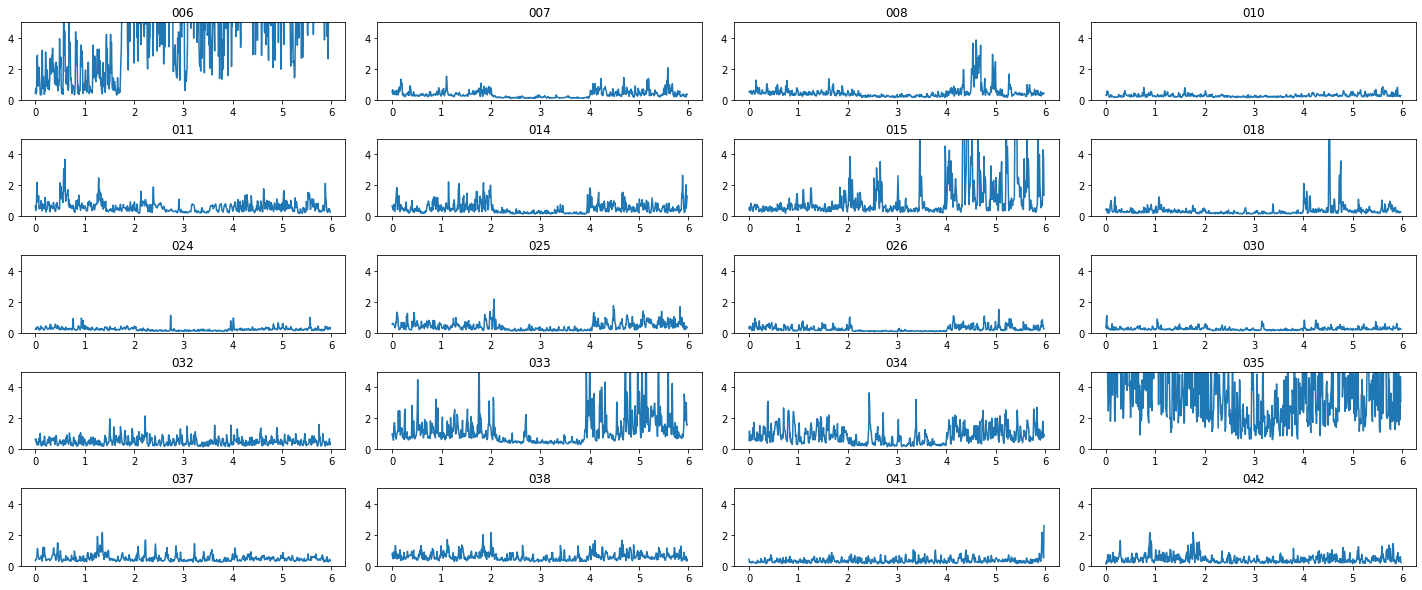

In [134]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datastdm)//4+(len(datastdm)%4>0)
for i in range(len(datastdm)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datastdm[i,:]))/2/60
    plt.plot(xlabel,datastdm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,5)
    plt.title(filesfp[i][:3])

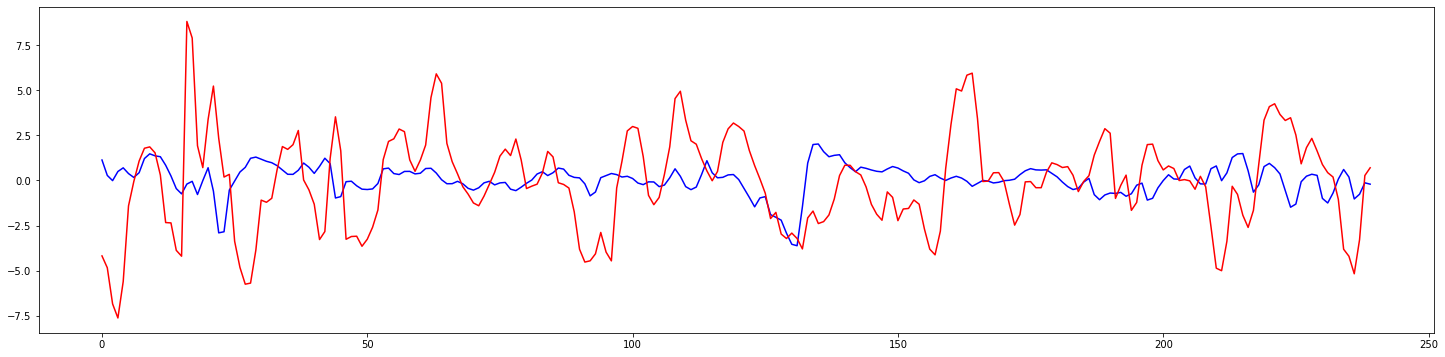

In [135]:
fig=plt.figure(figsize=(25,6))
plt.plot(datamedm[1,:240],c='b')
plt.plot(datamedc[1,:240],c='r')
plt.show()

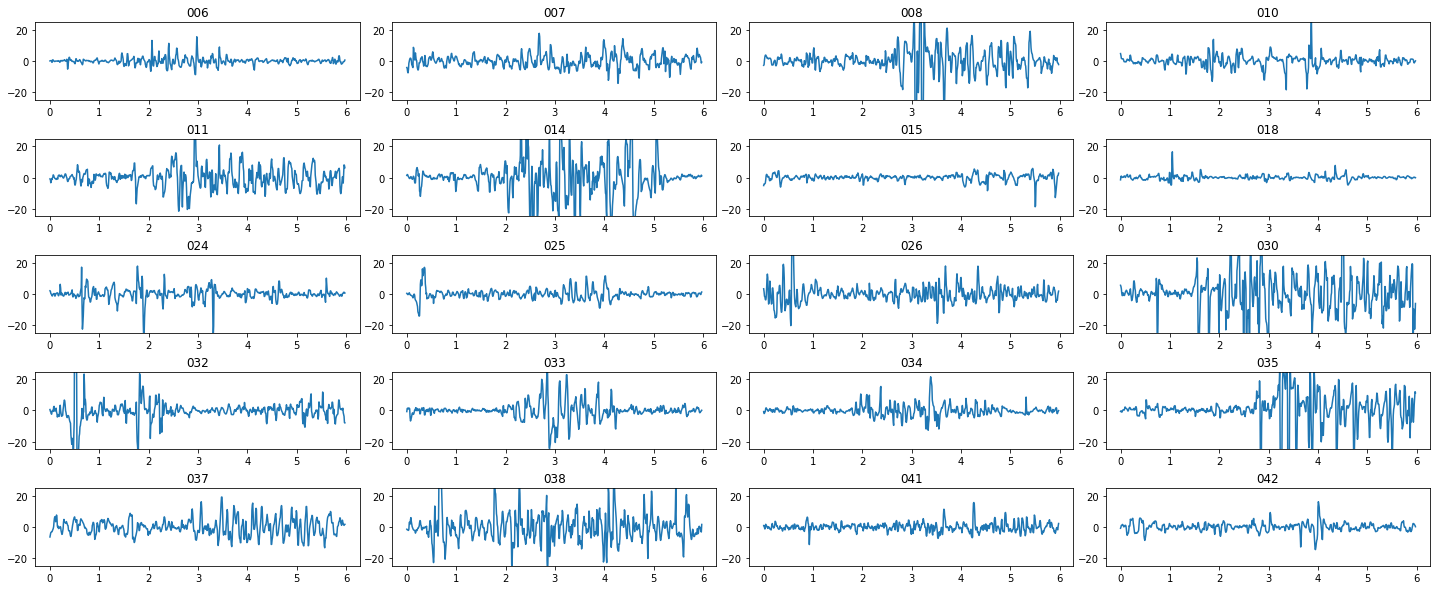

In [136]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datamedc)//4+(len(datamedc)%4>0)
for i in range(len(datamedc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datamedc[i,:]))/2/60
    plt.plot(xlabel,datamedc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-25,25)
    plt.title(filesfp[i][:3])

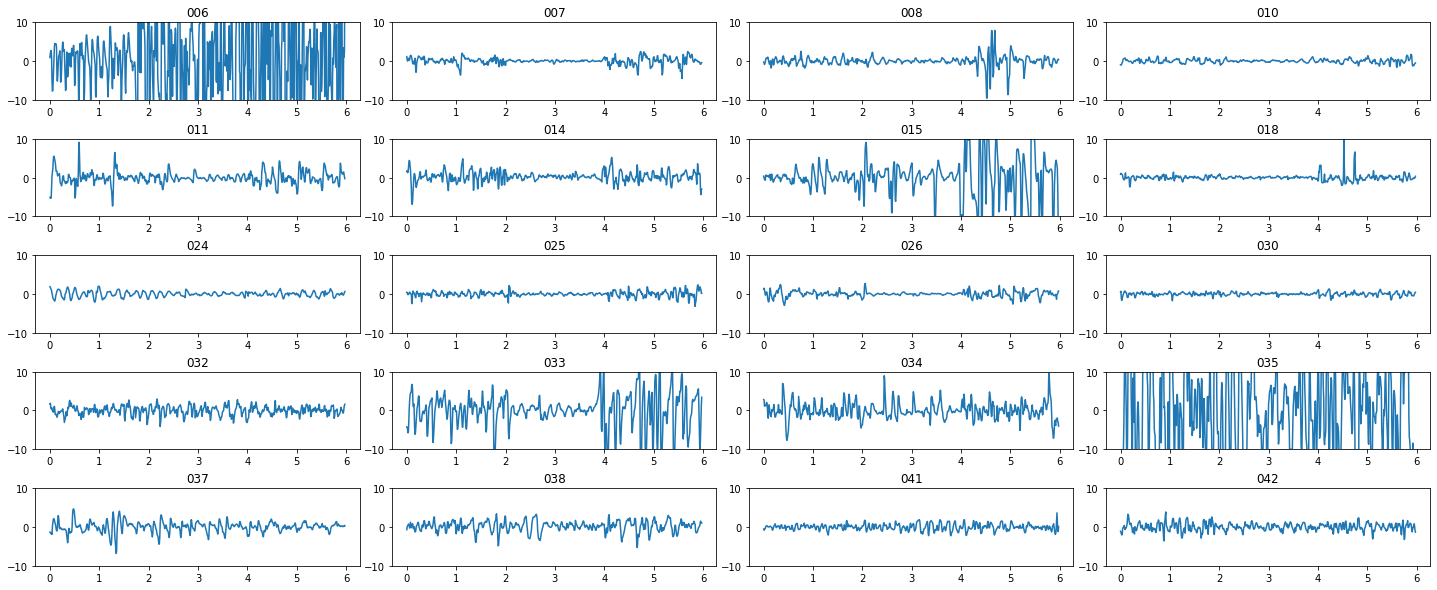

In [137]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datamedm)//4+(len(datamedm)%4>0)
for i in range(len(datamedm)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datamedm[i,:]))/2/60
    plt.plot(xlabel,datamedm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-10,10)
    plt.title(filesfp[i][:3])

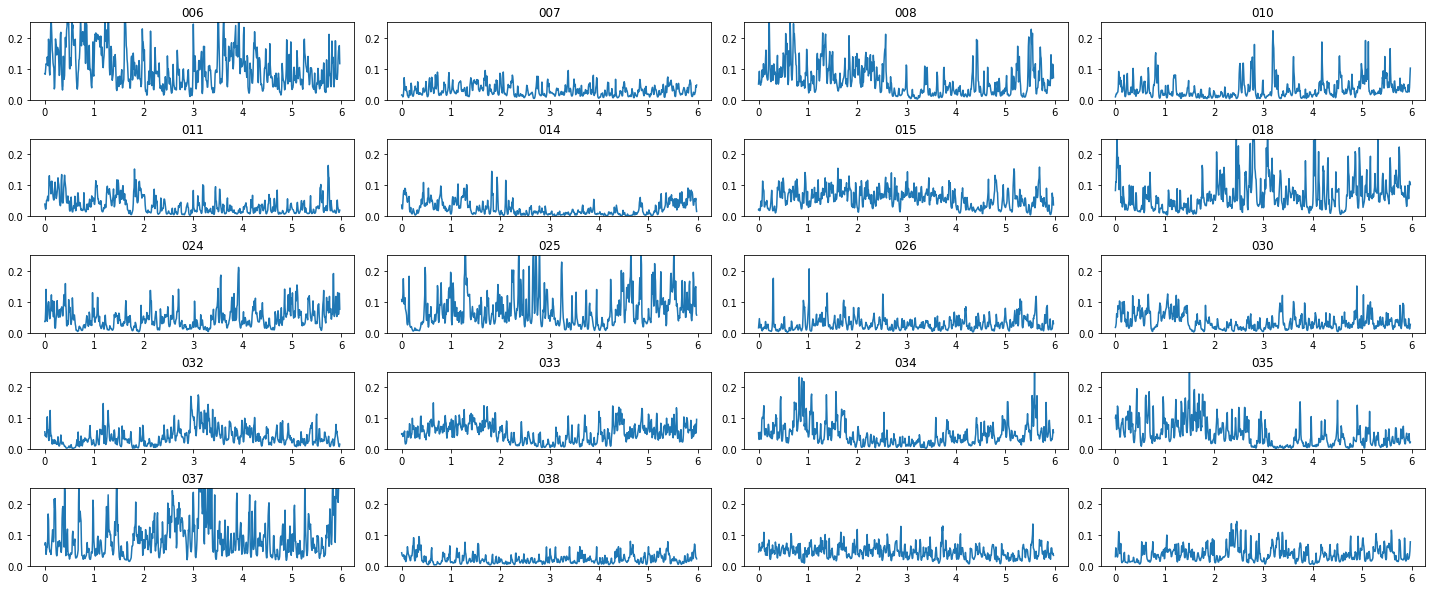

In [138]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahmc)//4+(len(datahmc)%4>0)
for i in range(len(datahmc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahmc[i,:]))/2/60
    plt.plot(xlabel,datahmc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,.25)
    plt.title(filesfp[i][:3])

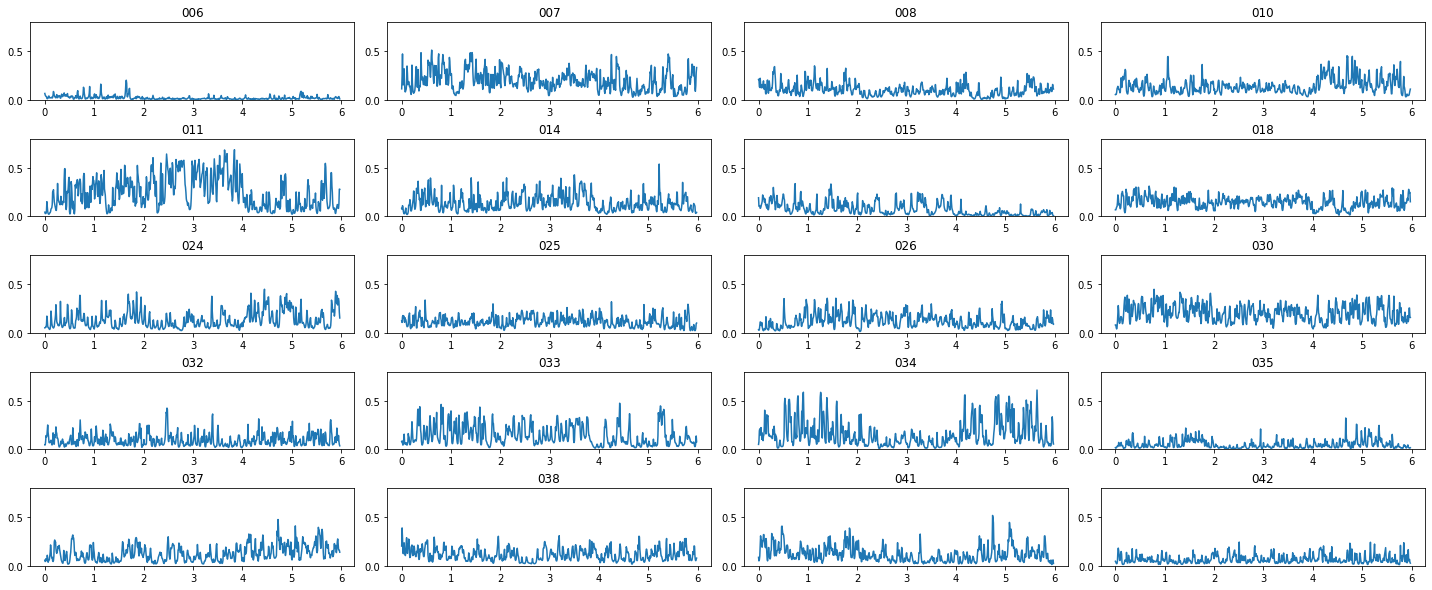

In [139]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahmm)//4+(len(datahmm)%4>0)
for i in range(len(datahmm)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahmm[i,:]))/2/60
    plt.plot(xlabel,datahmm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,.8)
    plt.title(filesfp[i][:3])

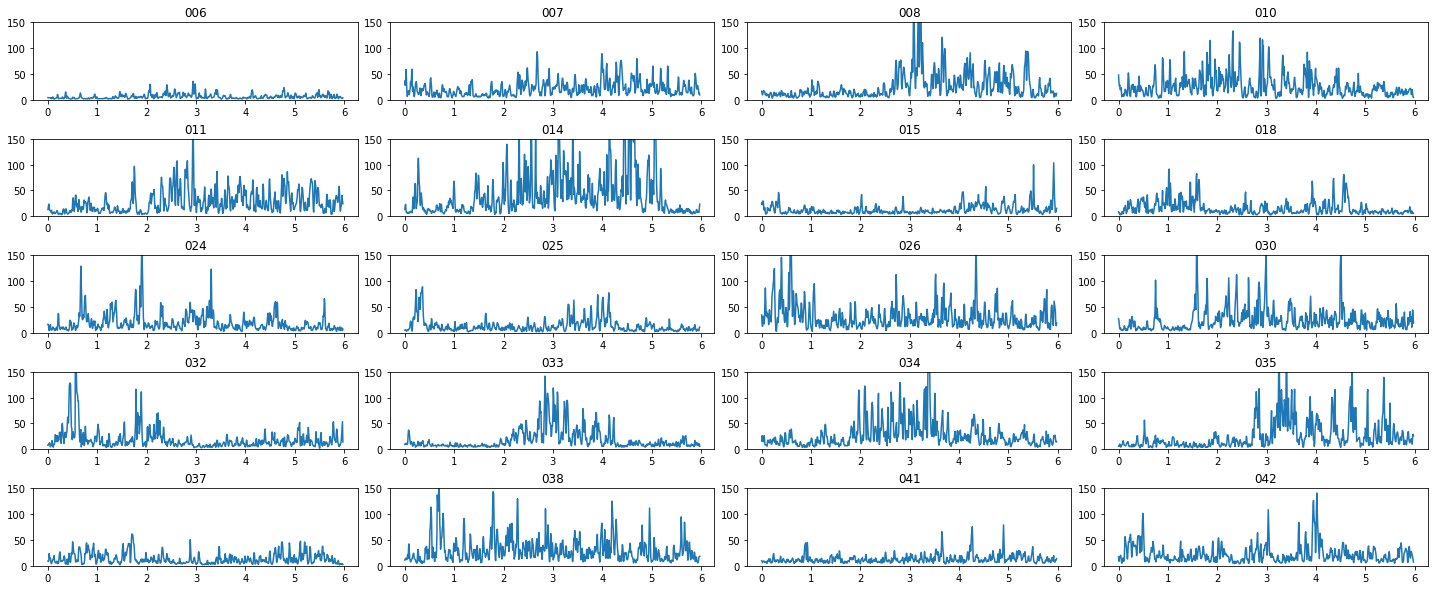

In [140]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahcc)//4+(len(datahcc)%4>0)
for i in range(len(datahcc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahcc[i,:]))/2/60
    plt.plot(xlabel,datahcc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,150)
    plt.title(filesfp[i][:3])

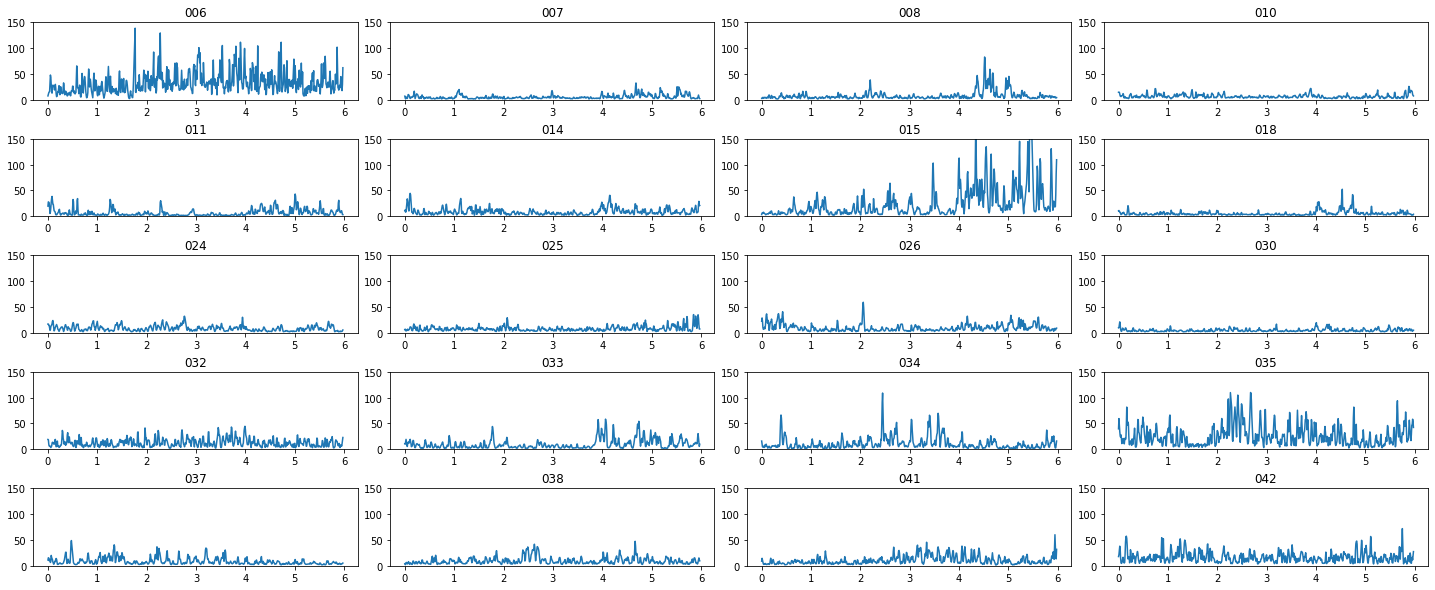

In [141]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahcm)//4+(len(datahcm)%4>0)
for i in range(len(datahcm)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahcm[i,:]))/2/60
    plt.plot(xlabel,datahcm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,150)
    plt.title(filesfp[i][:3])

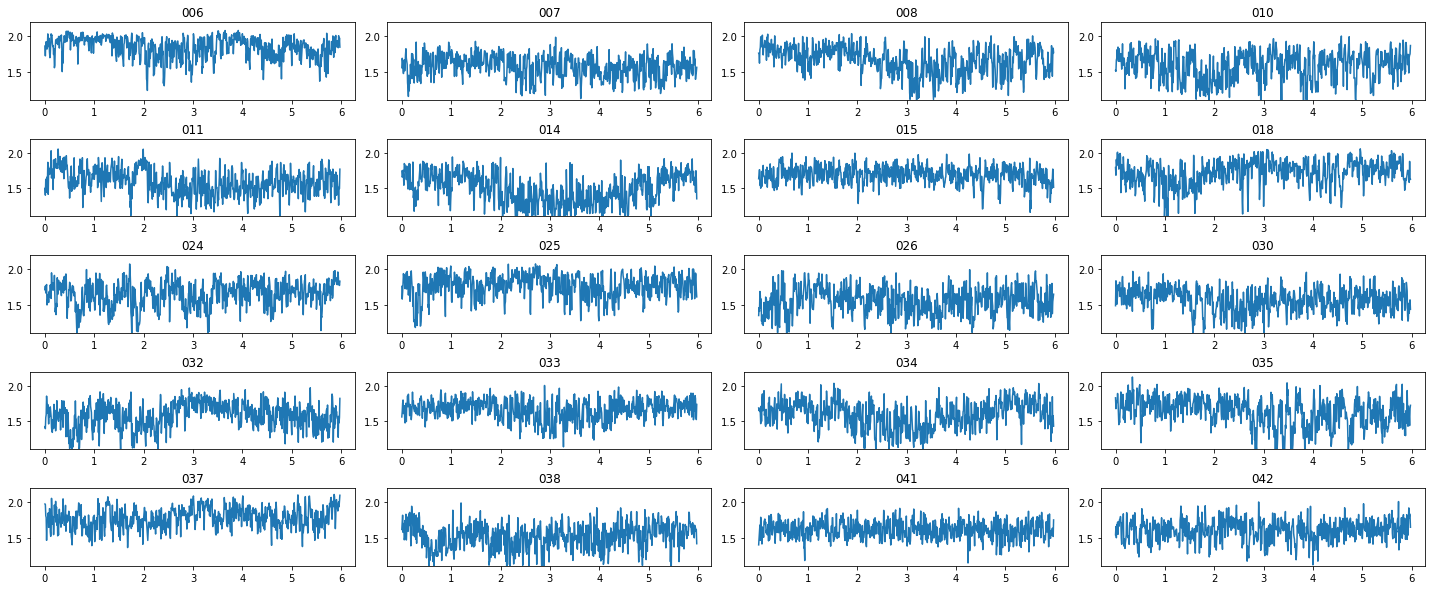

In [142]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahfdc)//4+(len(datahfdc)%4>0)
for i in range(len(datahfdc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahfdc[i,:]))/2/60
    plt.plot(xlabel,datahfdc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(1.1,2.2)
    plt.title(filesfp[i][:3])

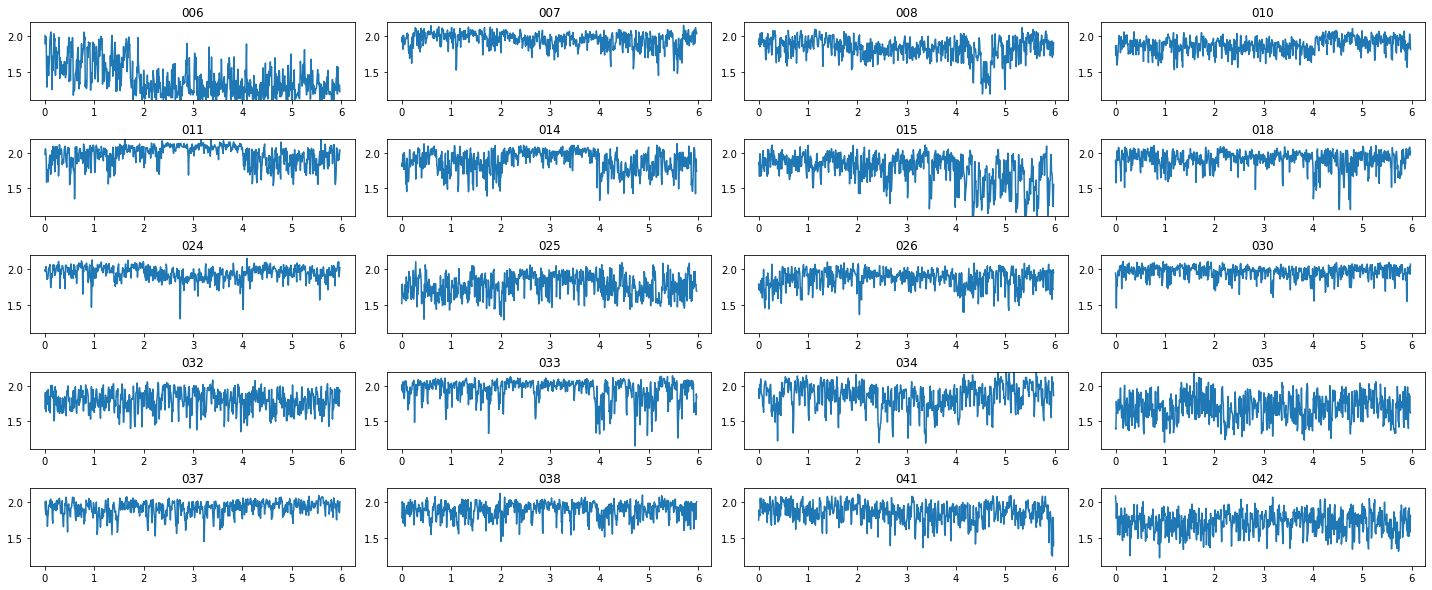

In [143]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahfdm)//4+(len(datahfdm)%4>0)
for i in range(len(datahfdm)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahfdm[i,:]))/2/60
    plt.plot(xlabel,datahfdm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(1.1,2.2)
    plt.title(filesfp[i][:3])

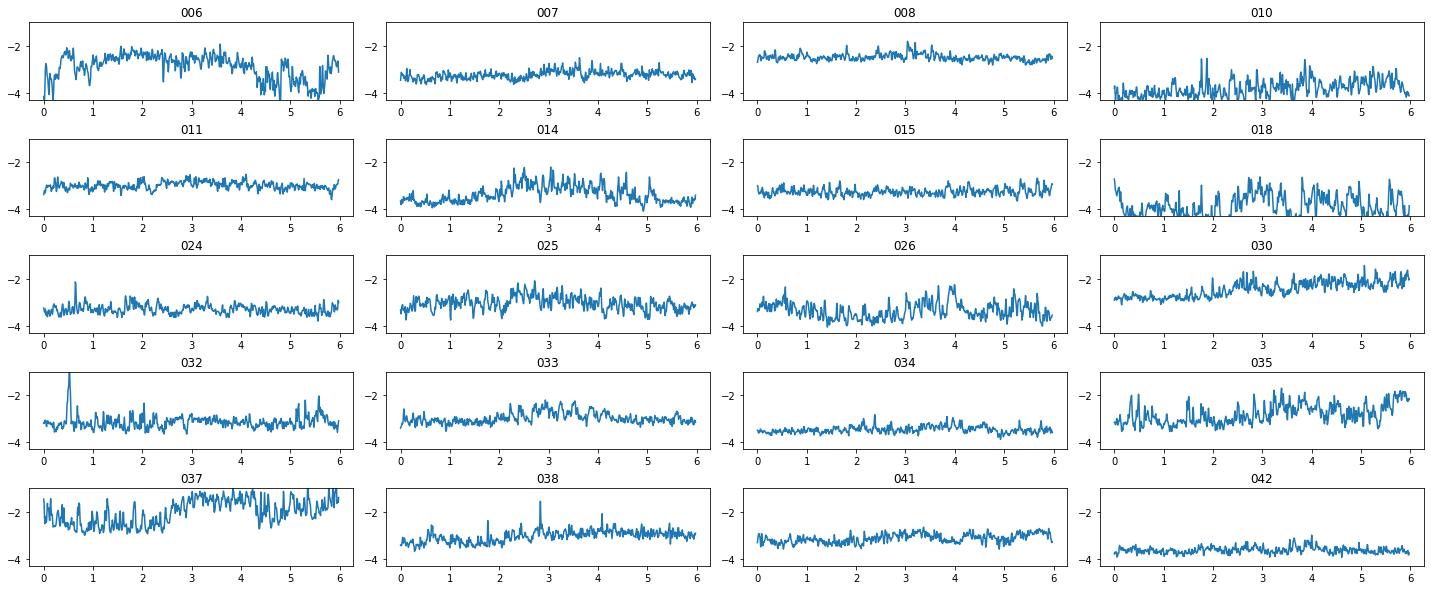

In [144]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahlrc)//4+(len(datahlrc)%4>0)
for i in range(len(datahlrc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahlrc[i,:]))/2/60
    plt.plot(xlabel,datahlrc[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-4.3,-1)
    plt.title(filesfp[i][:3])

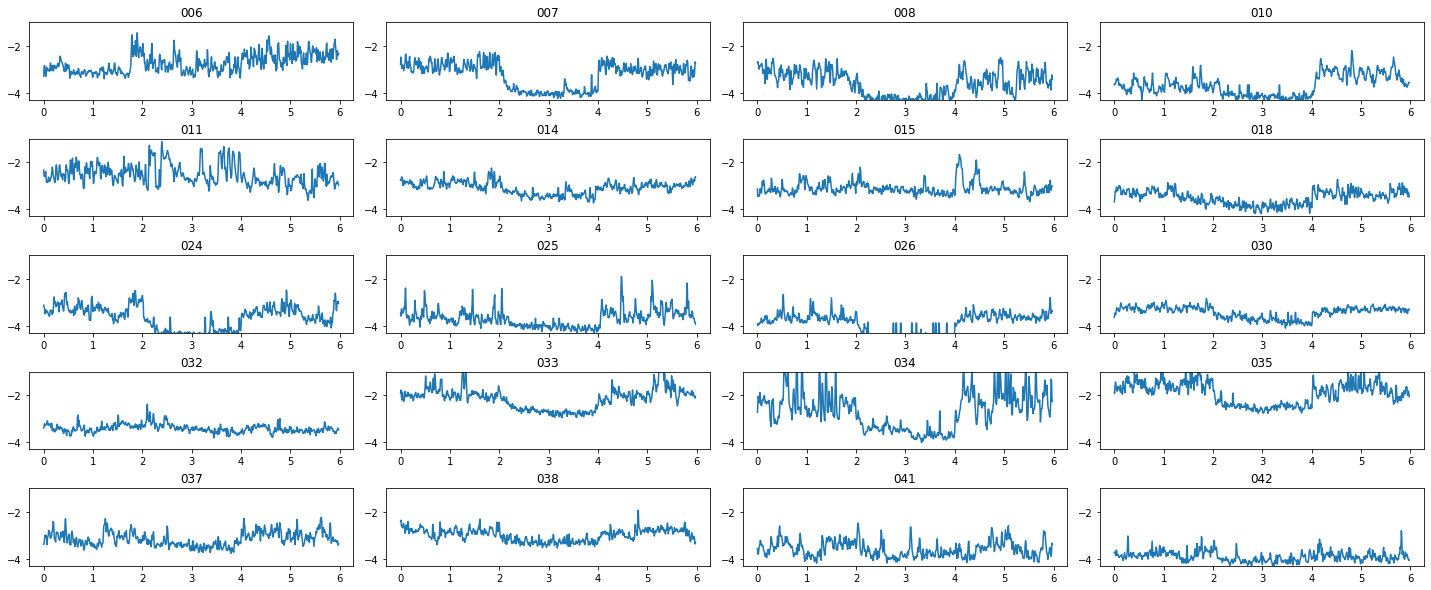

In [145]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahlrm)//4+(len(datahlrm)%4>0)
for i in range(len(datahlrc)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahlrm[i,:]))/2/60
    plt.plot(xlabel,datahlrm[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(-4.3,-1)
    plt.title(filesfp[i][:3])

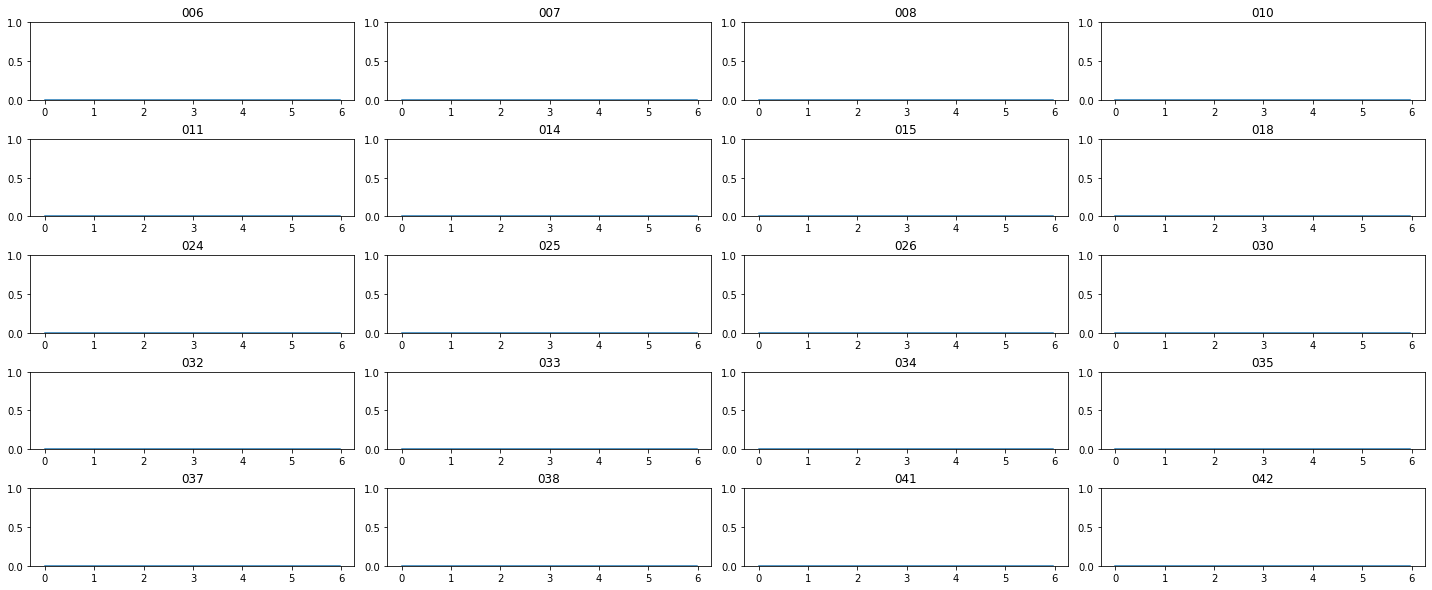

In [146]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahsec)//4+(len(datahsec)%4>0)
for i in range(len(datahsec)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahsec[i,:]))/2/60
    plt.plot(xlabel,datahsec[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,1)
    plt.title(filesfp[i][:3])

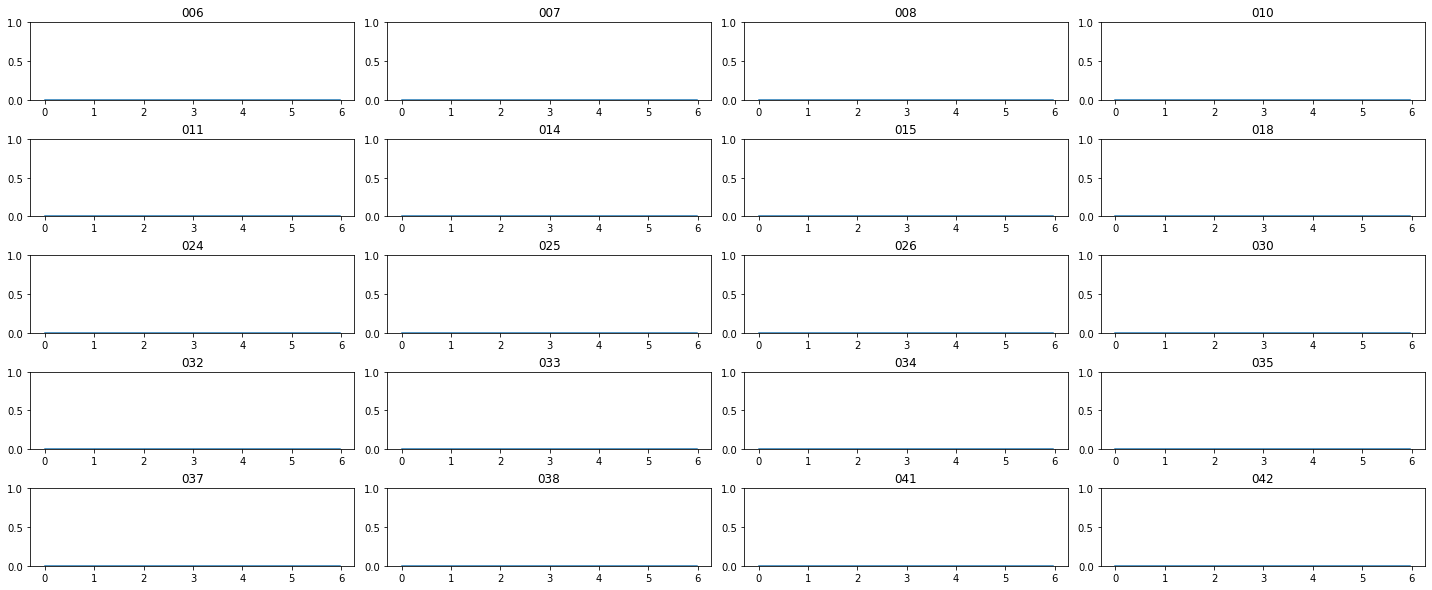

In [147]:
fig=plt.figure(figsize=(25,10))
num_rows = len(datahsem)//4+(len(datahsem)%4>0)
for i in range(len(datahsem)):
    plt.subplot(num_rows,4,i+1)
    xlabel=np.arange(len(datahsem[i,:]))/2/60
    plt.plot(xlabel,datahsem[i,:])
    #plt.plot(xlabel,bdatam[i][0][:,13])
    #plt.show()
    plt.subplots_adjust(wspace=0.1,hspace=0.5)
    plt.ylim(0,1)
    plt.title(filesfp[i][:3])

In [148]:
from sklearn.manifold import TSNE

In [149]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resultstd=Tsne.fit_transform(datastdc)

In [150]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resultmed=Tsne.fit_transform(datamedc)

In [151]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resulthm=Tsne.fit_transform(datahmc)

In [152]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resulthc=Tsne.fit_transform(datahcc)

In [153]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resulthfd=Tsne.fit_transform(datahfdc)

In [154]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
#resulthl=Tsne.fit_transform(datahlc) # imput contains nan

In [155]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resultse=Tsne.fit_transform(datahsec)

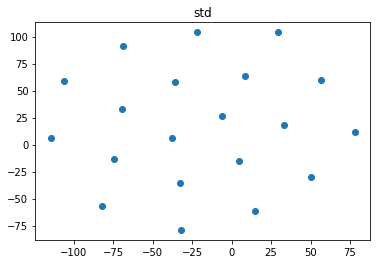

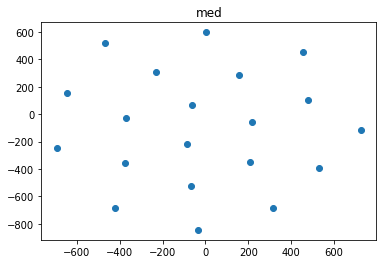

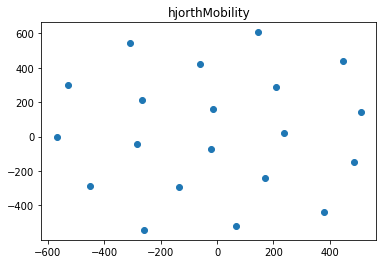

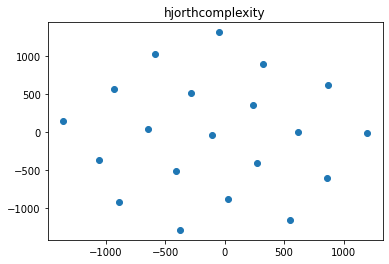

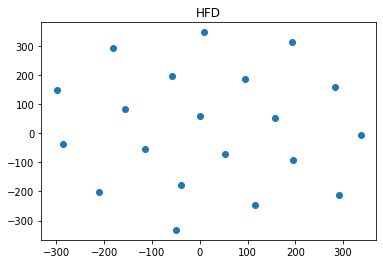

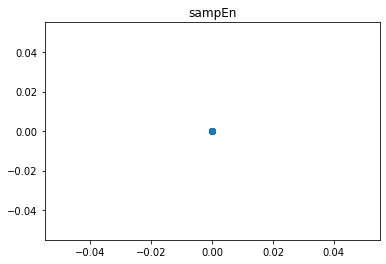

In [156]:
plt.scatter(resultstd[:,0],resultstd[:,1])
plt.title('std')
plt.show()

plt.scatter(resultmed[:,0],resultmed[:,1])
plt.title('med')
plt.show()

plt.scatter(resulthm[:,0],resulthm[:,1])
plt.title('hjorthMobility')
plt.show()

plt.scatter(resulthc[:,0],resulthc[:,1])
plt.title('hjorthcomplexity')
plt.show()

plt.scatter(resulthfd[:,0],resulthfd[:,1])
plt.title('HFD')
plt.show()

plt.scatter(resultse[:,0],resultse[:,1])
plt.title('sampEn')
plt.show()

In [157]:
Tsne=TSNE(n_components=2, init='pca',random_state=0)
resultstdm=Tsne.fit_transform(datastdm)

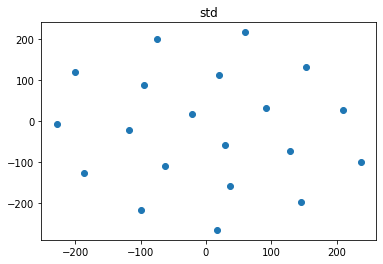

In [158]:
plt.scatter(resultstdm[:,0],resultstdm[:,1])
plt.title('std')
plt.show()